<a href="https://colab.research.google.com/github/sophiadto1/Data-Science/blob/main/dela_Torre_orosz_Lab_8_Linear_Model_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

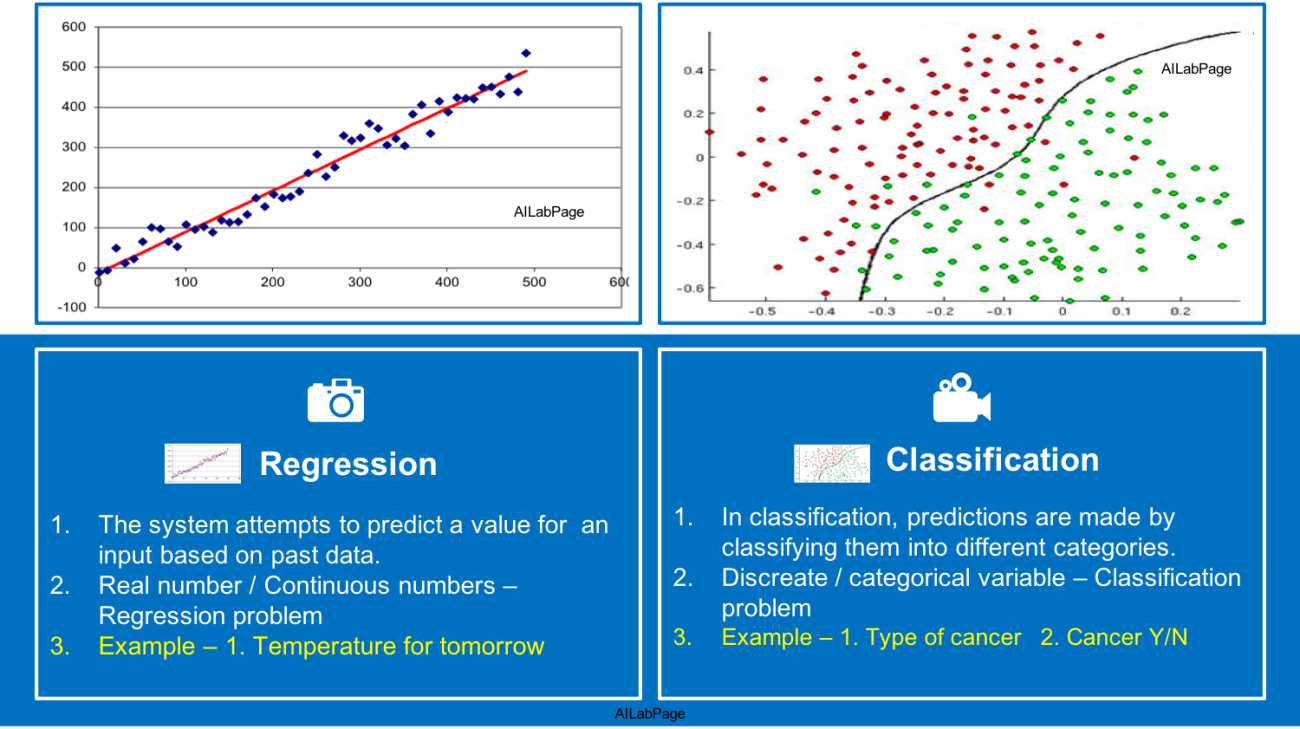

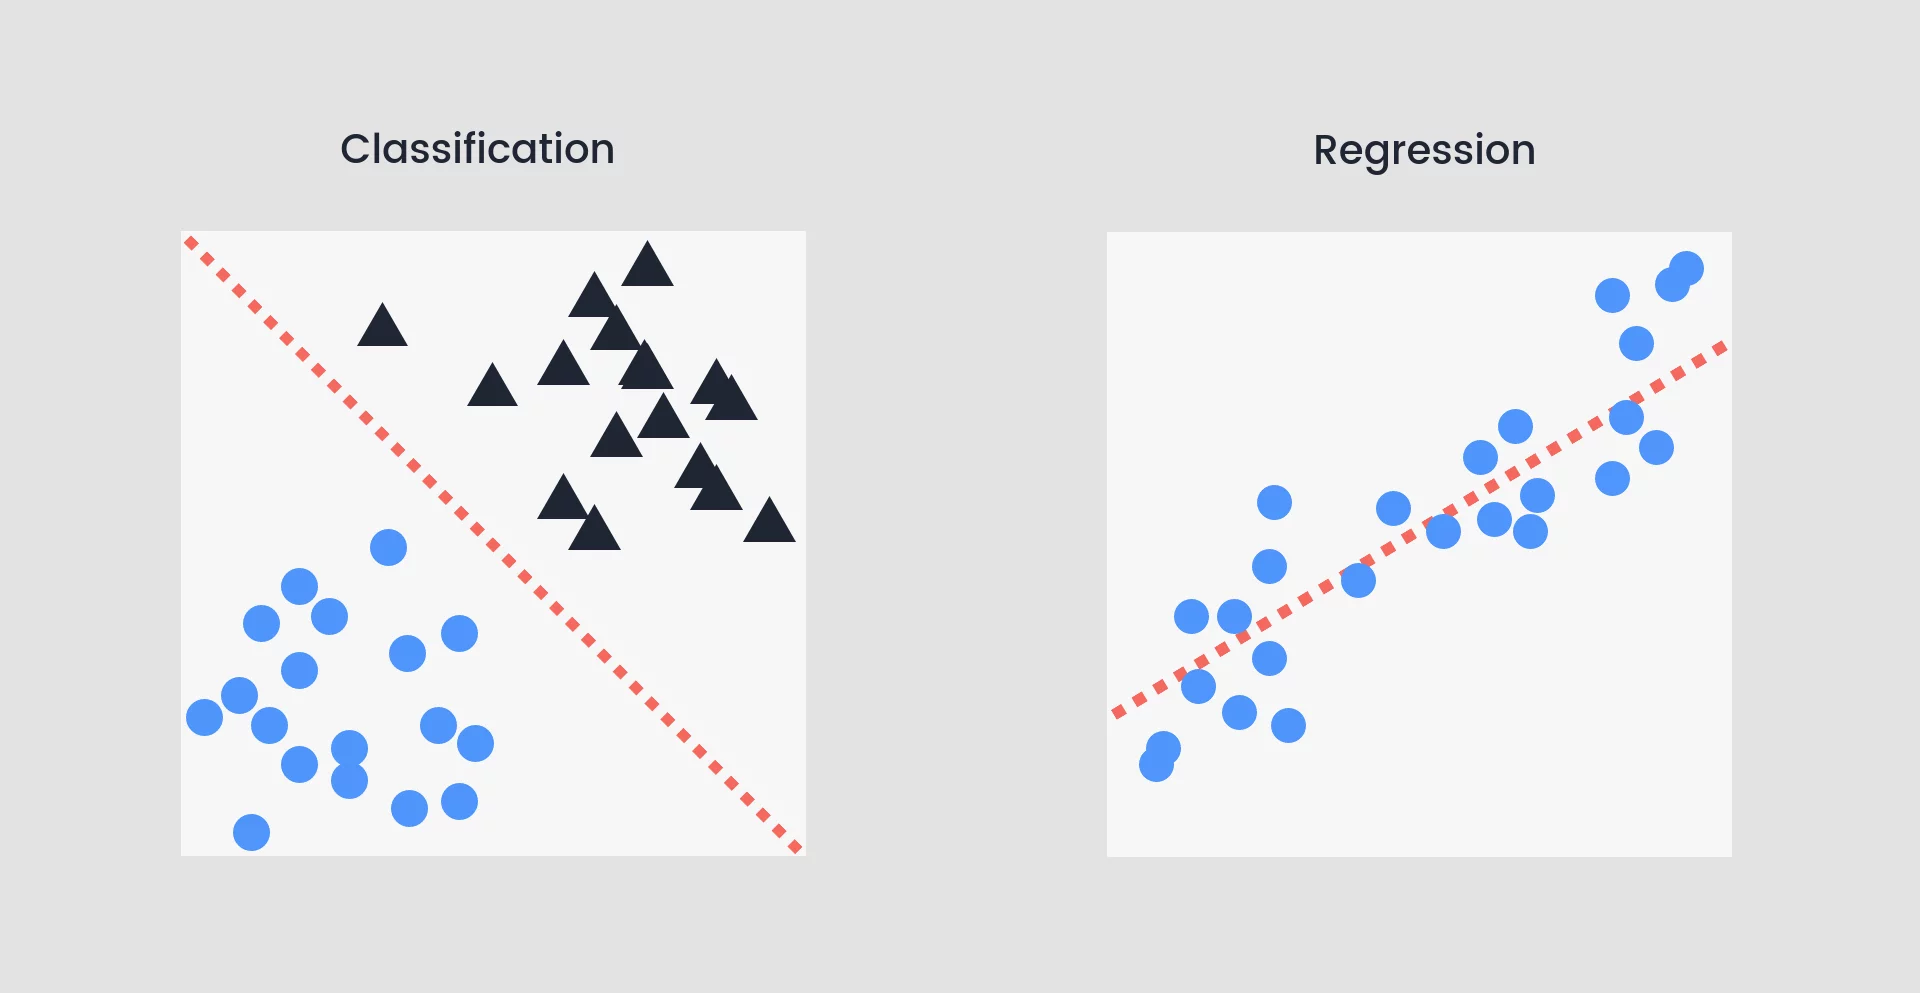

https://docs.google.com/presentation/d/1gY6kLb7YJtWzWqprVe3XfOjHALkPH6I1FvZ7MssWiTU/edit?usp=sharing

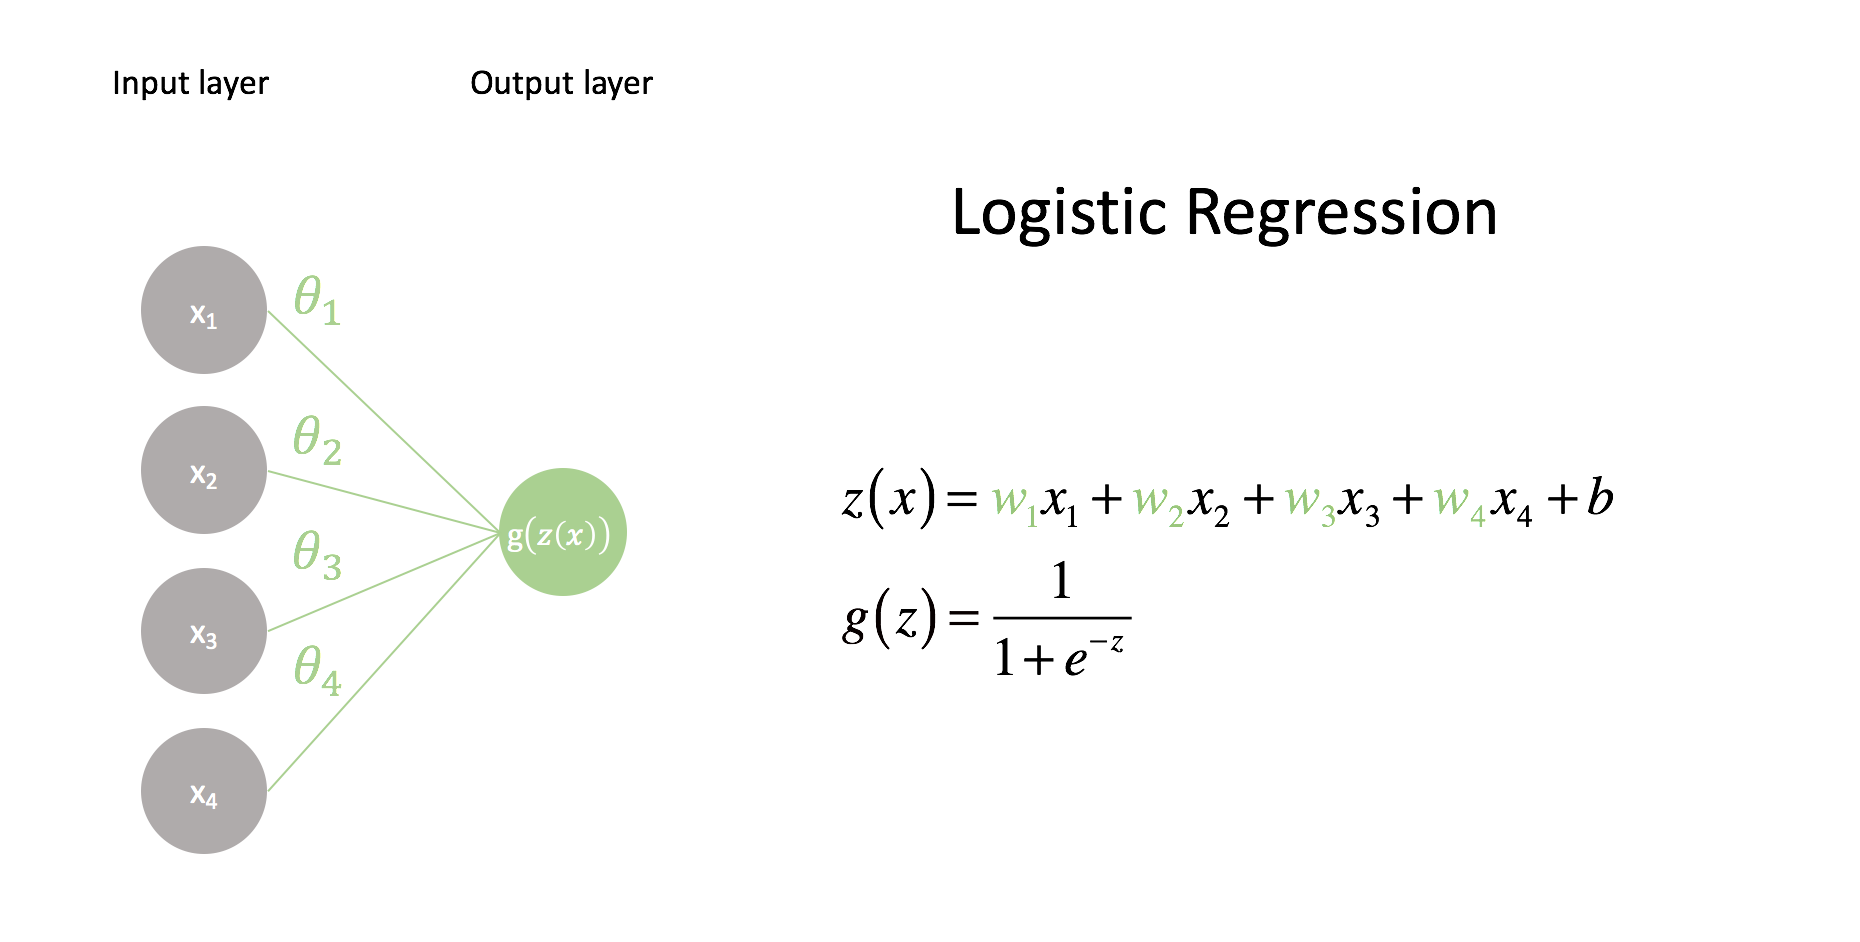

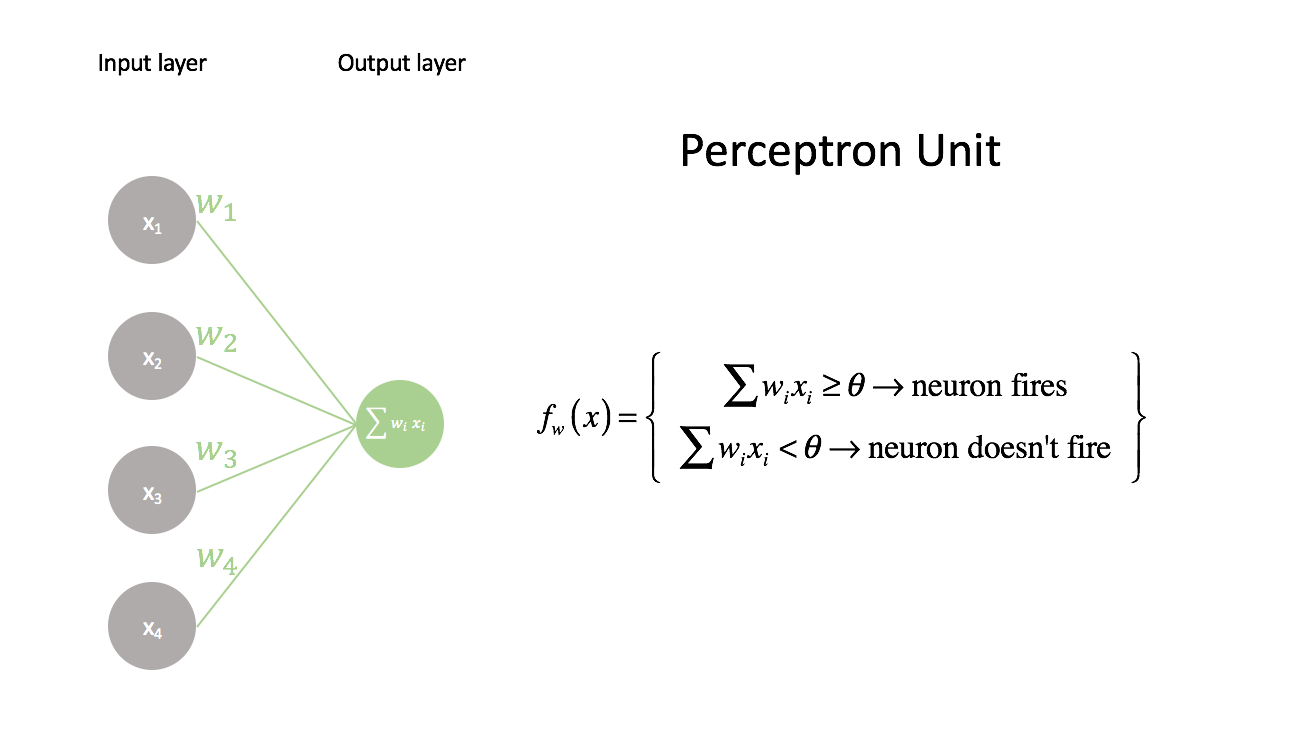

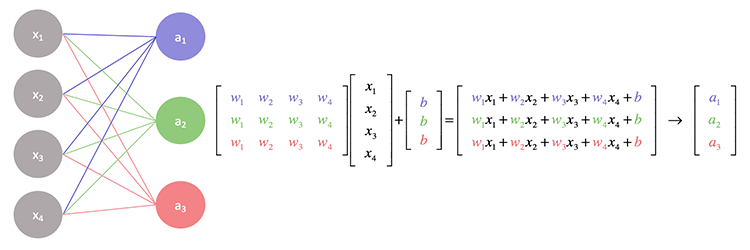

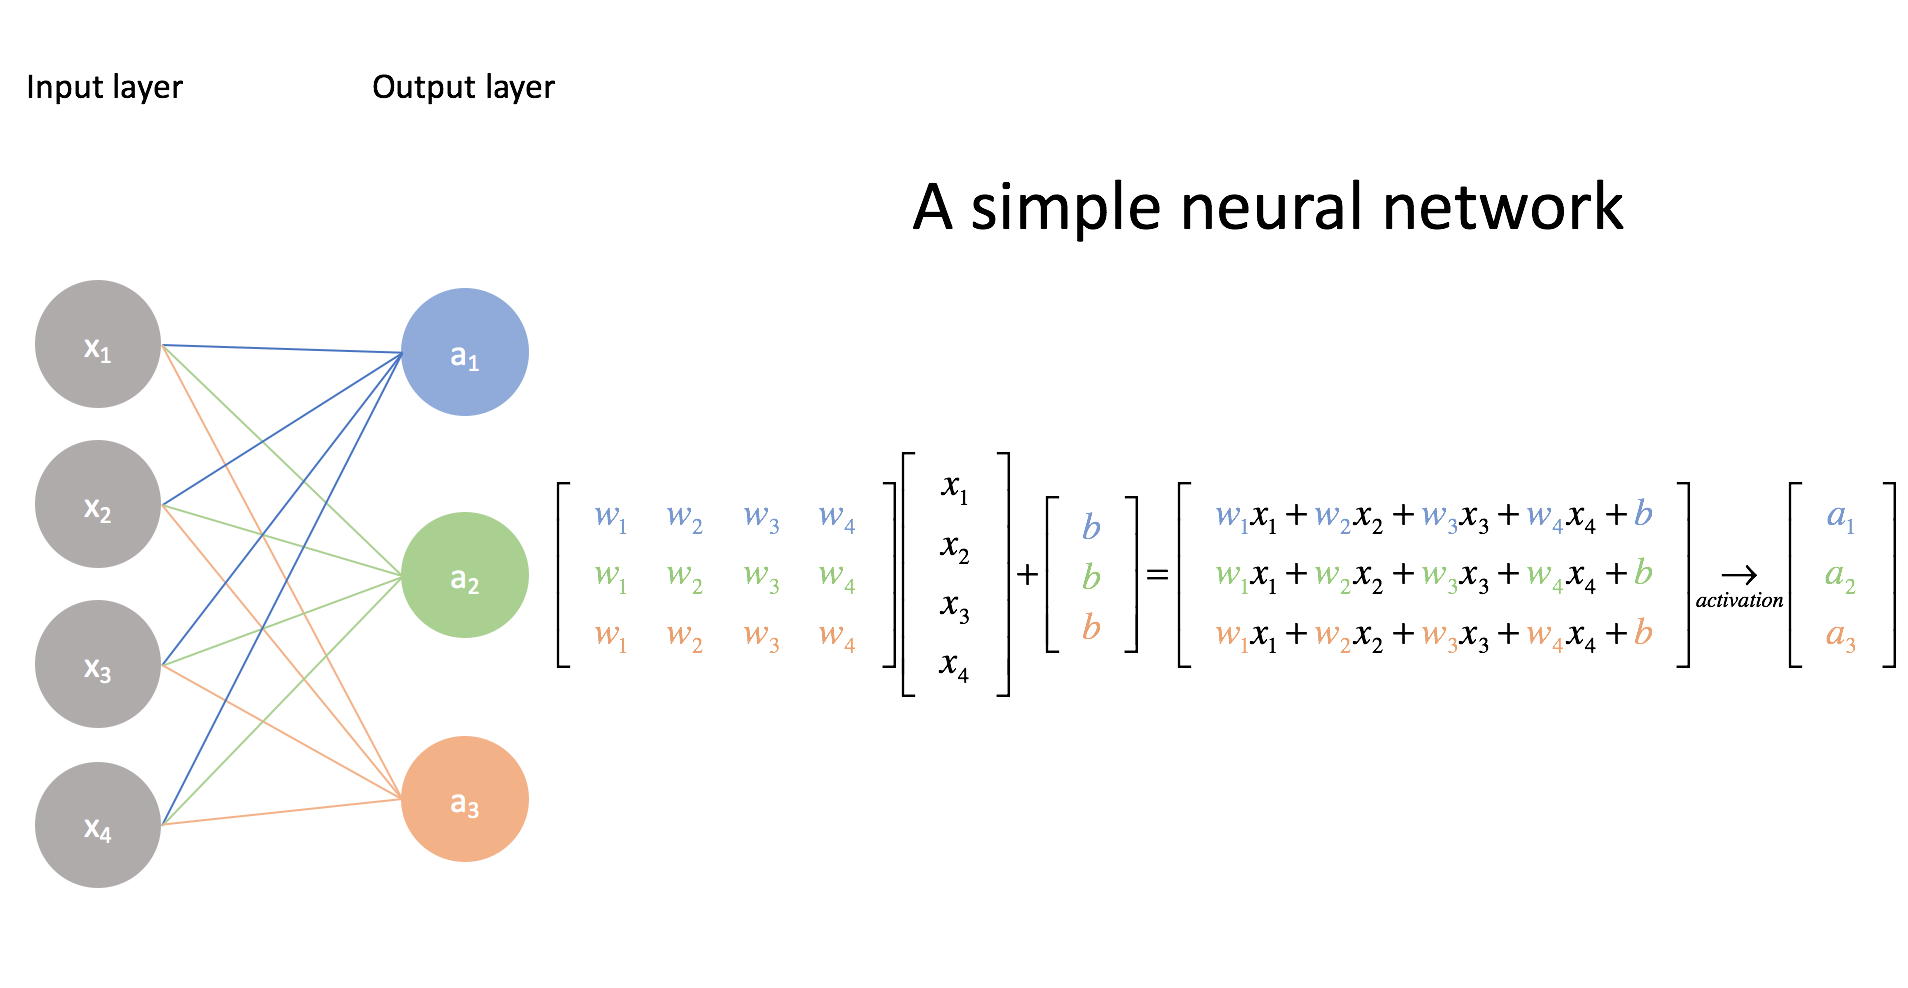

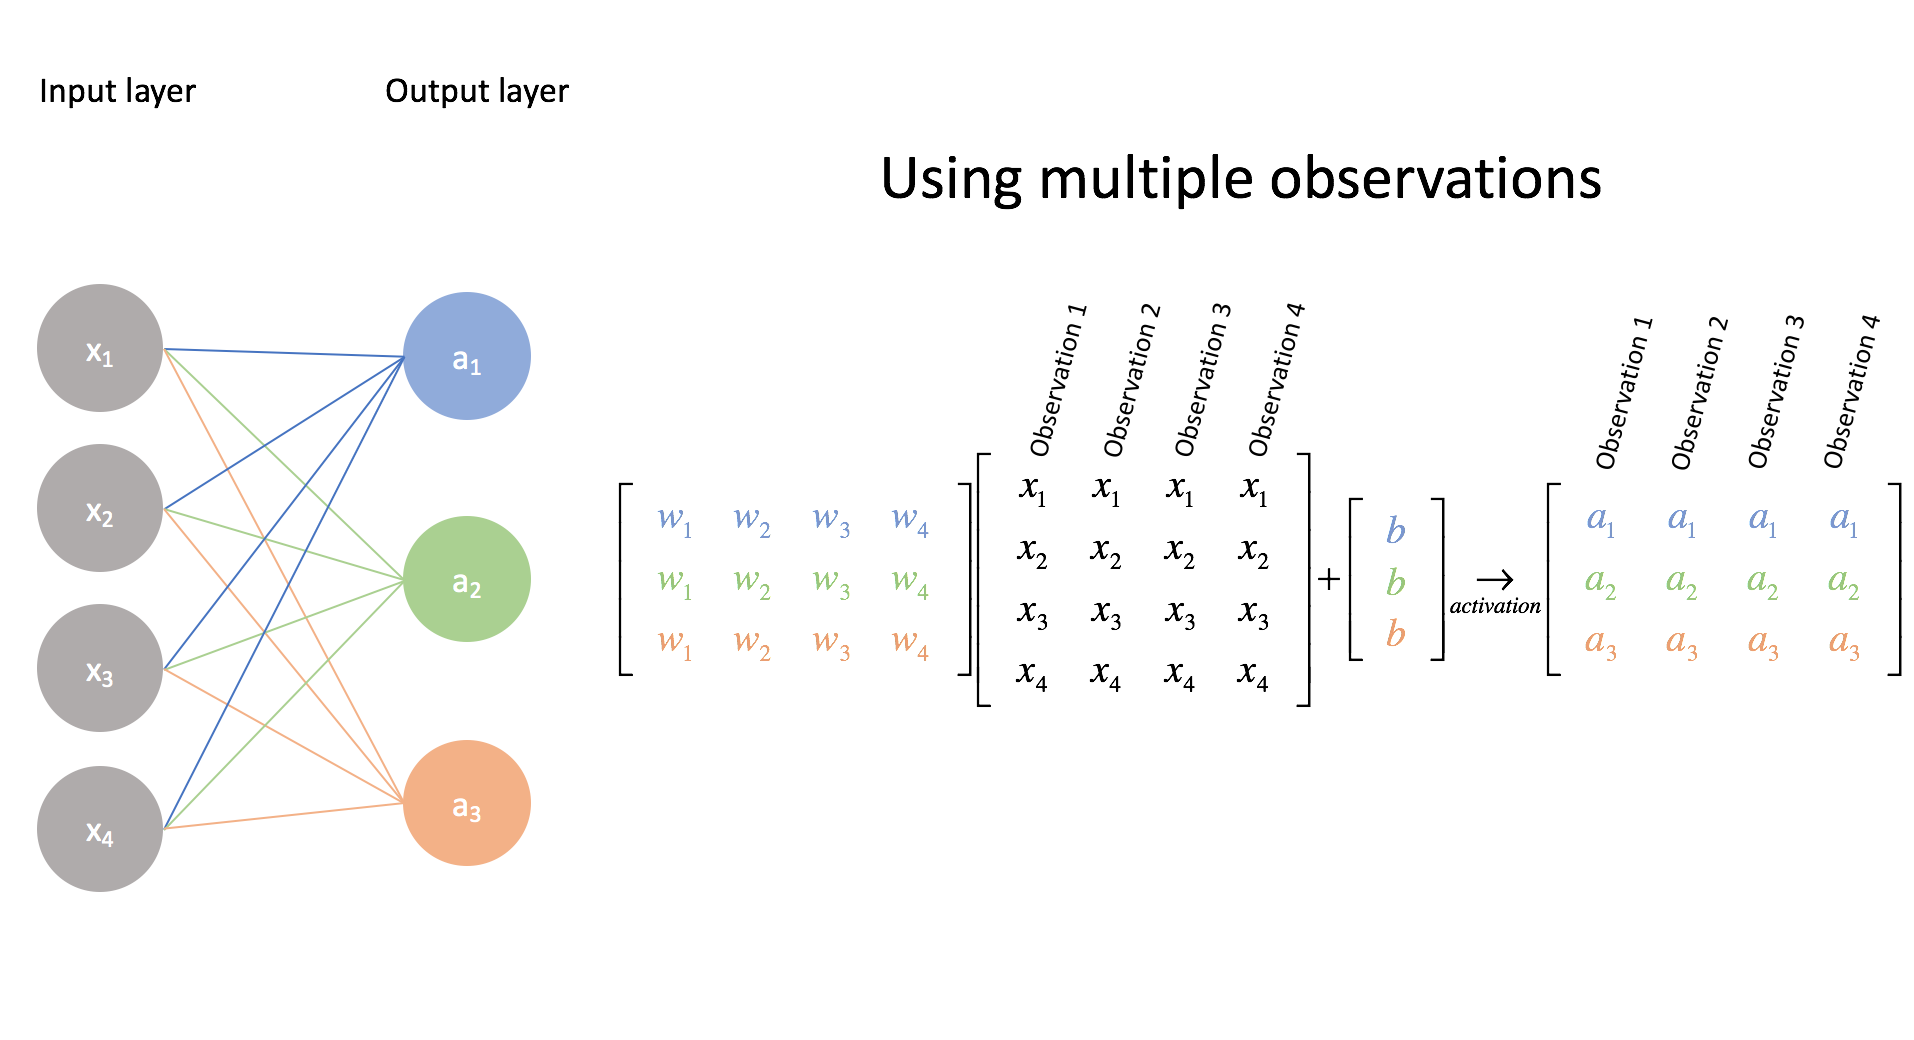

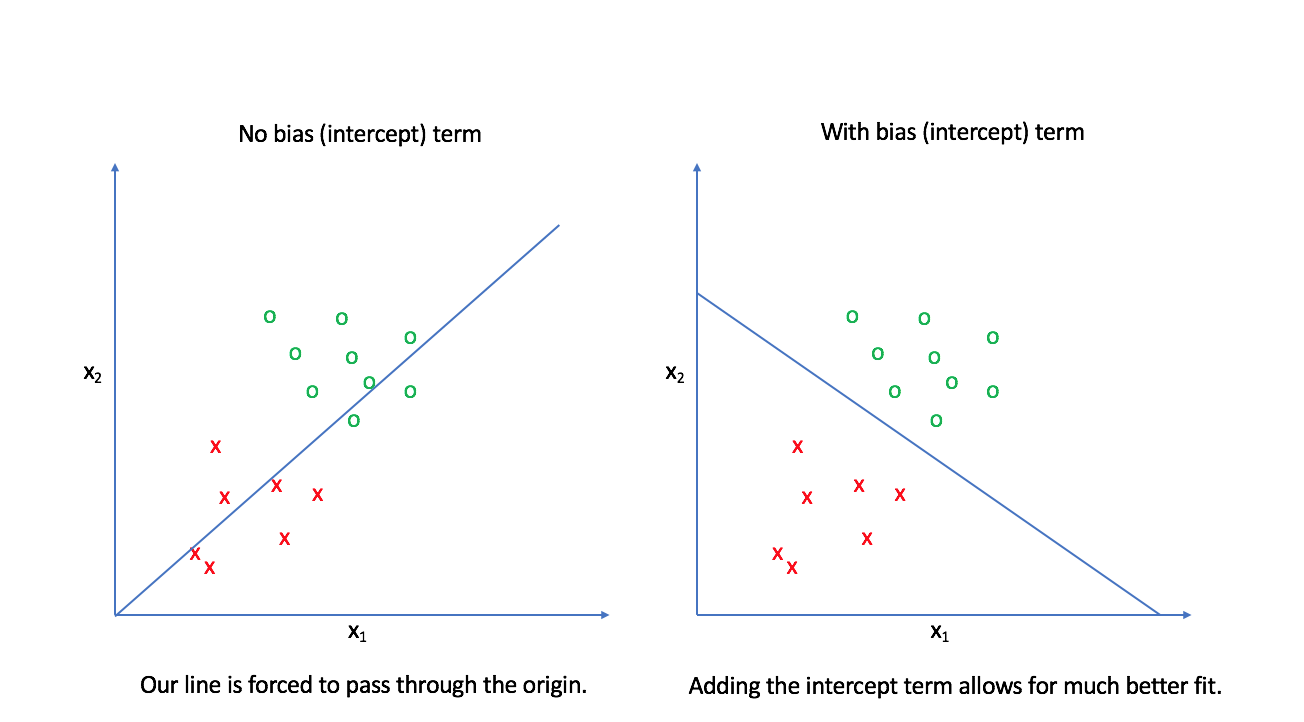

In [ ]:
!pip install git+https://github.com/williamedwardhahn/mpcr #importing functions
from mpcr import *
import numpy as np
import matplotlib.pyplot as plt
!pip install wget
import wget
import torch
import torch.nn as nn
from torch import tensor 
from torch.autograd import Variable
from torch import randn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/williamedwardhahn/mpcr to /tmp/pip-req-build-1d7tn5b7
  Running command git clone -q https://github.com/williamedwardhahn/mpcr /tmp/pip-req-build-1d7tn5b7
  Created wheel for ImportMPCR: filename=ImportMPCR-0.0.1-py3-none-any.whl size=7683 sha256=af315010ac81a10564a9aec994962a2a15a591c52f7754fef2d3e154dd45429b
  Stored in directory: /tmp/pip-ephem-wheel-cache-ul6dyut_/wheels/81/51/4e/93fa1b6f290ba71f589593454d4d769f9baebd8c4c376822d9
Successfully built ImportMPCR


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=00bae397c6292c8bc2590d049e00b91cae14367c1293ddeeed3c4e87e3e93128
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


# $y=mx+b$

In [ ]:
x = np.arange(0,9) #Setting up range 

In [ ]:
x.shape 

(9,)

In [ ]:
x = x[:,None] #setting up function

In [ ]:
x.shape #shape of function

(9, 1)

In [ ]:
y = 3*x-5 #function

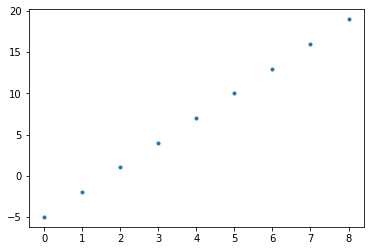

In [ ]:
plt.plot(x,y,'.') #plotting function on graph 

##Solve Linear Fit Using Pytorch Gradient Descent

In [ ]:
x = torch.Tensor(x) # Convert the numpy vectors to pytorch tensors 
y = torch.Tensor(y)

NameError: ignored

In [ ]:
m = Variable(randn(1,1), requires_grad=True) # Initialize pytorch variables, i.e. values you want to optimize. In this case with normally distributed random numbers, one for m the slope and one for b the interscept
b = Variable(randn(1,1), requires_grad=True)

In [ ]:
learning_rate = 0.001 # Descend Gradient Slowly so as to Not Overshoot Minima and Oscillate

In [ ]:
for t in range(1000):

    y_pred = m * x + b  # Define Model 
    
    loss = (y_pred - y).pow(2).sum() # Define Loss Function as Sum of the Squares of the Differences 

    loss.backward() # Calculate Gradient, dLoss/dp for Each Parameter p 
    
    m.data -= learning_rate * m.grad.data # Gradient Descent
    b.data -= learning_rate * b.grad.data

    m.grad.zero_() # Reset Gradient Value
    b.grad.zero_()

    print(t, loss.item(),m.item(),b.item())

In [ ]:
loss.item()

In [ ]:
m.item()

In [ ]:
b.item()

# Pytorch Linear Model

In [ ]:
# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 1000
learning_rate = 0.01

In [ ]:
# Linear regression model
model = nn.Linear(input_size, output_size)

In [ ]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

In [ ]:
# Convert numpy arrays to torch tensors
inputs = x
targets = y

In [ ]:
# Train the model
for epoch in range(num_epochs):
    
    
    # Forward pass
    outputs = model(inputs)
    
    loss = criterion(outputs, targets)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    
    print(epoch+1, num_epochs, loss.item())


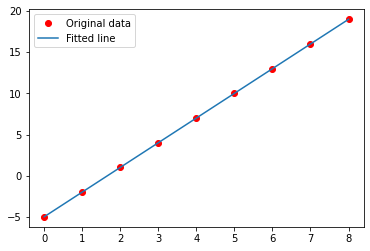

In [ ]:
# Plot the graph
predicted = model(inputs).detach().numpy()


plt.plot(x, y, 'ro', label='Original data')
plt.plot(x, predicted, label='Fitted line')
plt.legend()
plt.show()

In [ ]:
model

Linear(in_features=1, out_features=1, bias=True)

In [ ]:
model.weight

Parameter containing:
tensor([[2.9970]], requires_grad=True)

In [ ]:
model.bias

Parameter containing:
tensor([-4.9832], requires_grad=True)

In [ ]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [ ]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 10)
    plt.show()

In [ ]:
def plotfc(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'cool')
    ax.axis('off')
    fig.set_size_inches(10, 10)
    plt.colorbar(im)
    plt.show()

In [ ]:
def montage_plot(x):
    x = np.pad(x, pad_width=((0, 0), (1, 1), (1, 1)), mode='constant', constant_values=0)
    plot(montage(x))

In [ ]:
def one_hot(y):
    y2 = GPU_data(torch.zeros((y.shape[0],10)))
    for i in range(y.shape[0]):
        y2[i,int(y[i])] = 1
    return y2

In [ ]:
# #MNIST
#train_set = datasets.MNIST('./data', train=True, download=True)
#test_set = datasets.MNIST('./data', train=False, download=True)

#KMNIST
train_set = datasets.KMNIST('./data', train=True, download=True)
test_set = datasets.KMNIST('./data', train=False, download=True)

# Fashion MNIST
#train_set = datasets.FashionMNIST('./data', train=True, download=True)
#test_set = datasets.FashionMNIST('./data', train=False, download=True)

  0%|          | 0/18165135 [00:00<?, ?it/s]

Extracting ./data/KMNIST/raw/train-images-idx3-ubyte.gz to ./data/KMNIST/raw



  0%|          | 0/29497 [00:00<?, ?it/s]

Extracting ./data/KMNIST/raw/train-labels-idx1-ubyte.gz to ./data/KMNIST/raw



  0%|          | 0/3041136 [00:00<?, ?it/s]

Extracting ./data/KMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/KMNIST/raw



  0%|          | 0/5120 [00:00<?, ?it/s]

Extracting ./data/KMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/KMNIST/raw



In [ ]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()

X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255

In [ ]:
X.shape

(60000, 1, 28, 28)

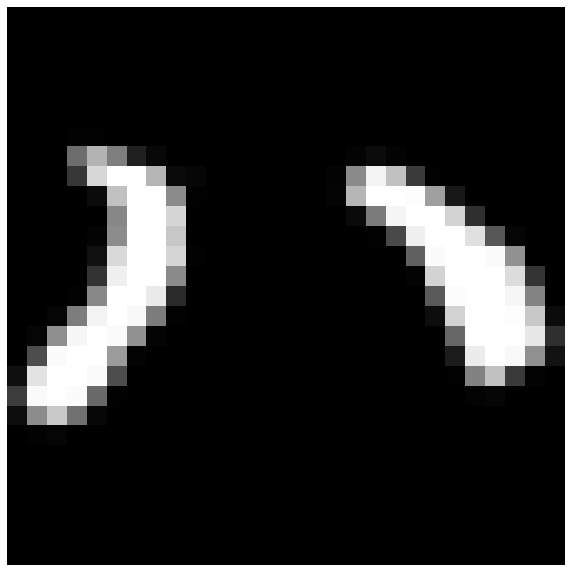

In [ ]:
plot(X[13,0,:,:])

In [ ]:
Y[123]

2

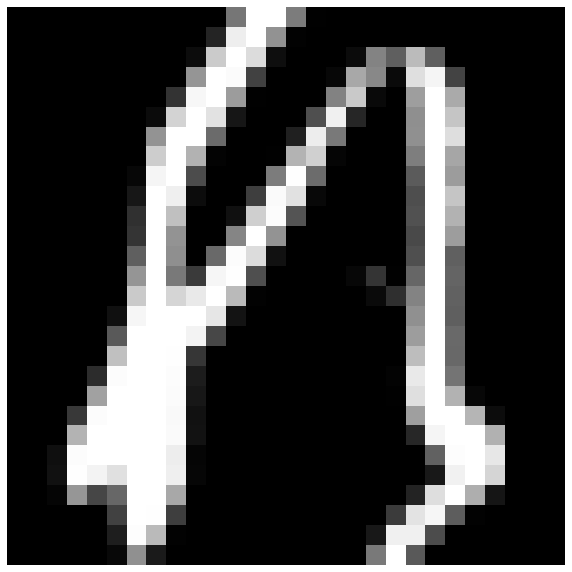

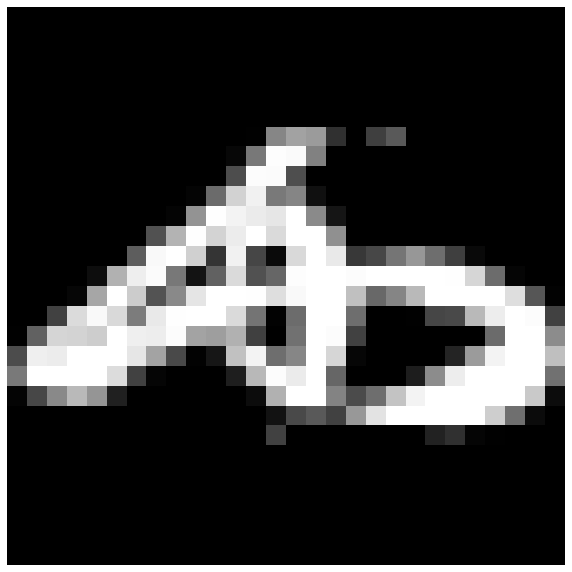

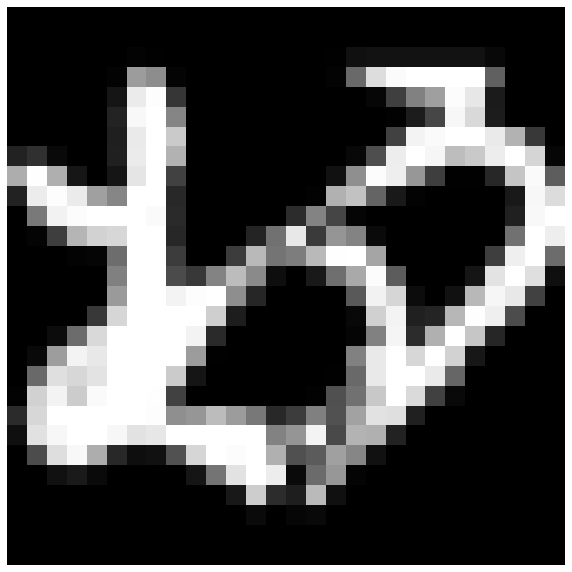

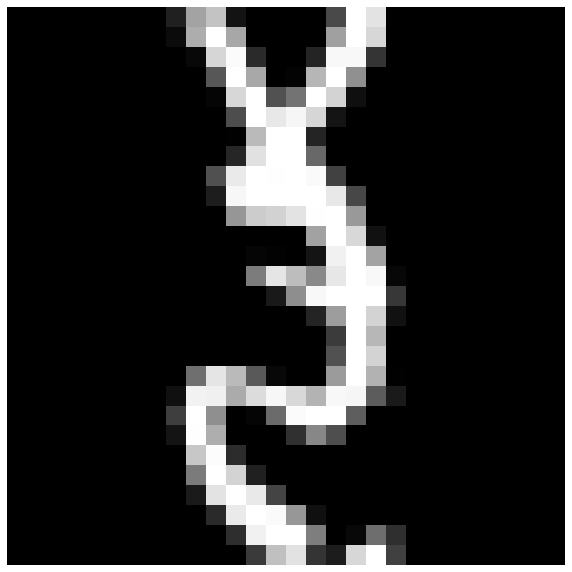

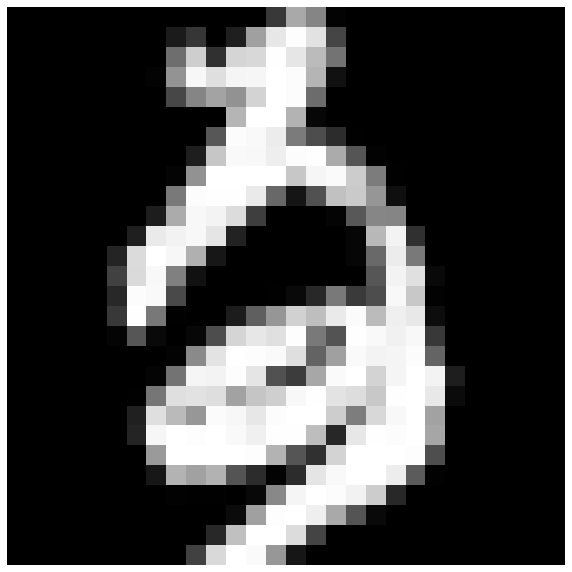

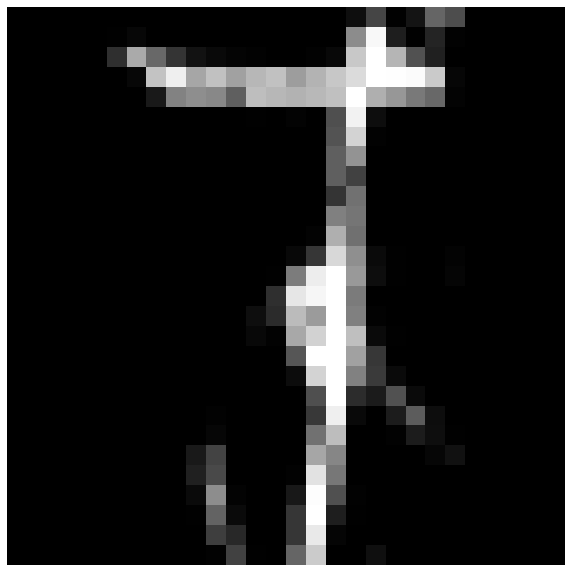

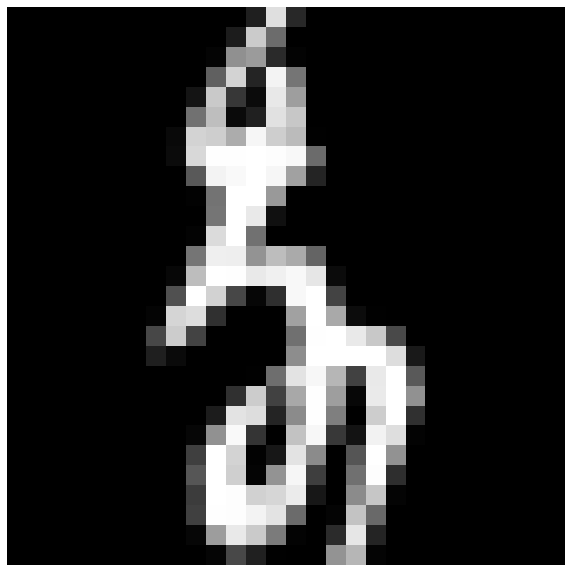

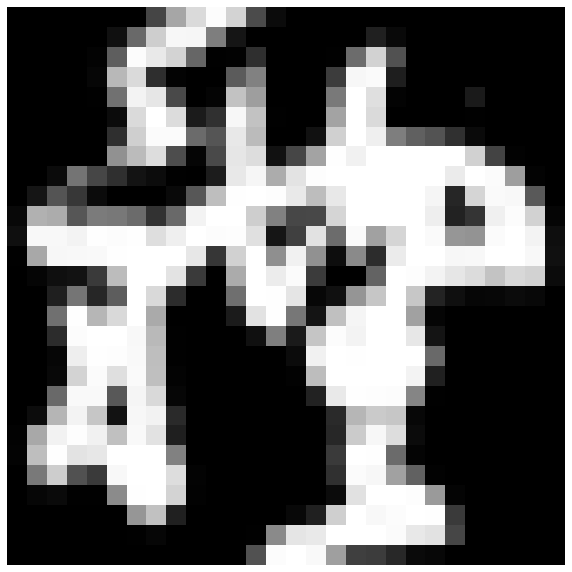

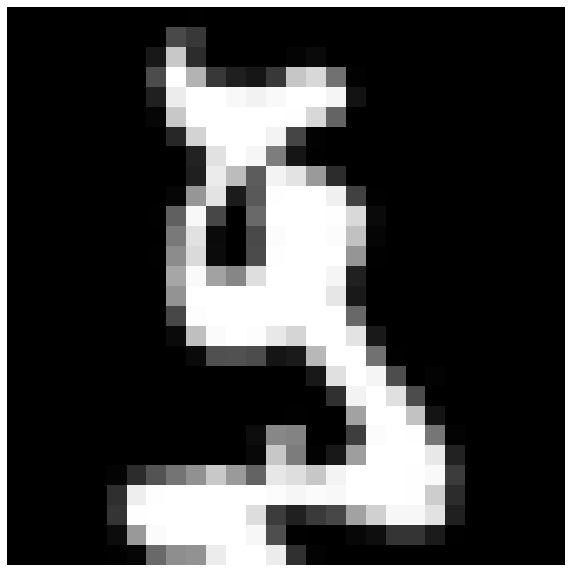

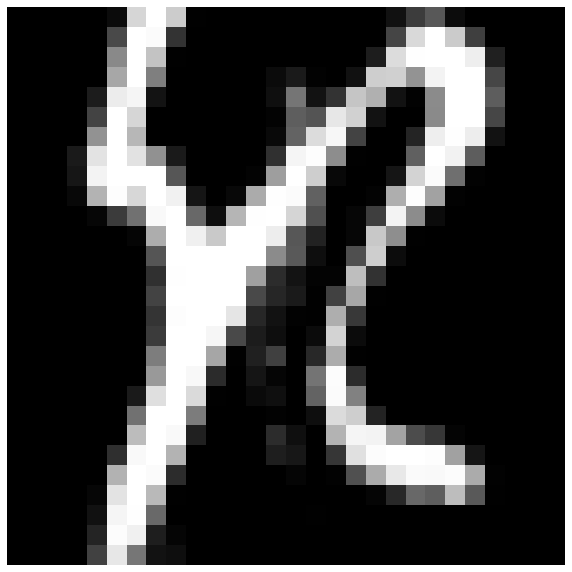

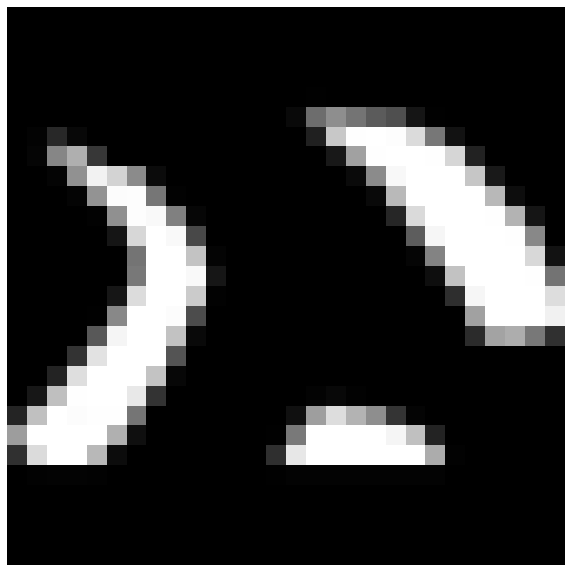

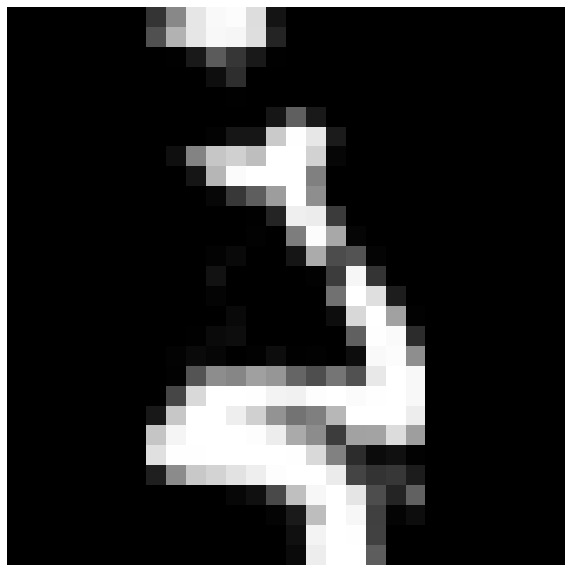

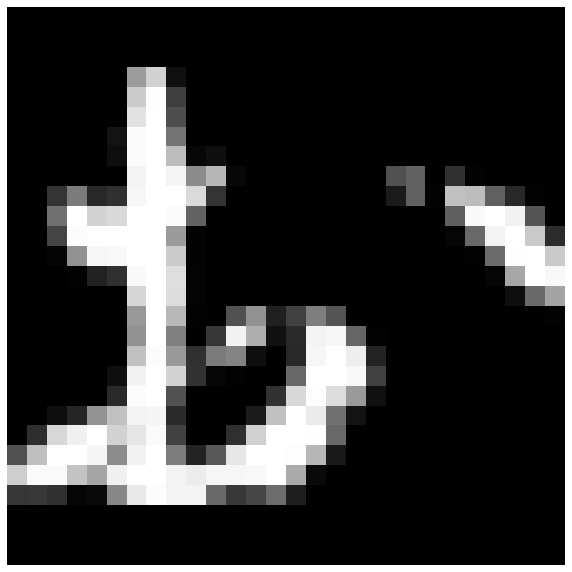

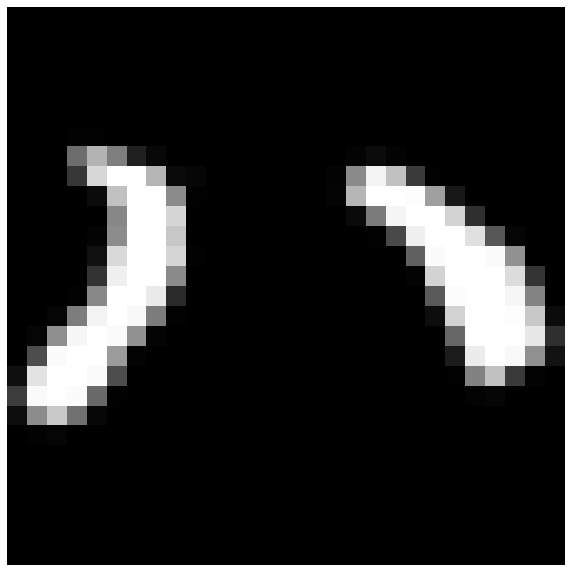

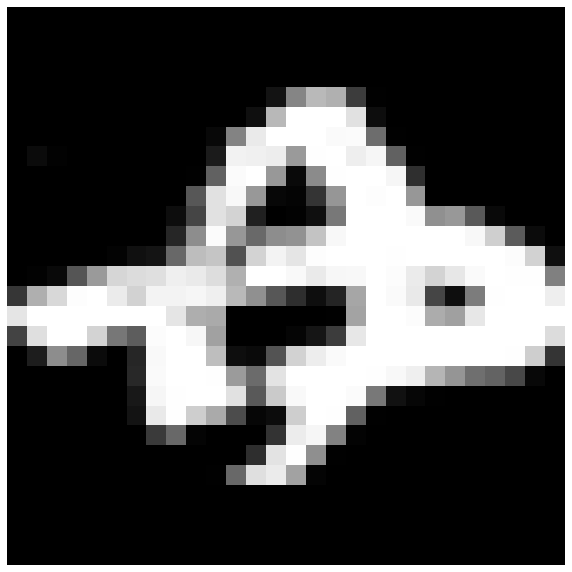

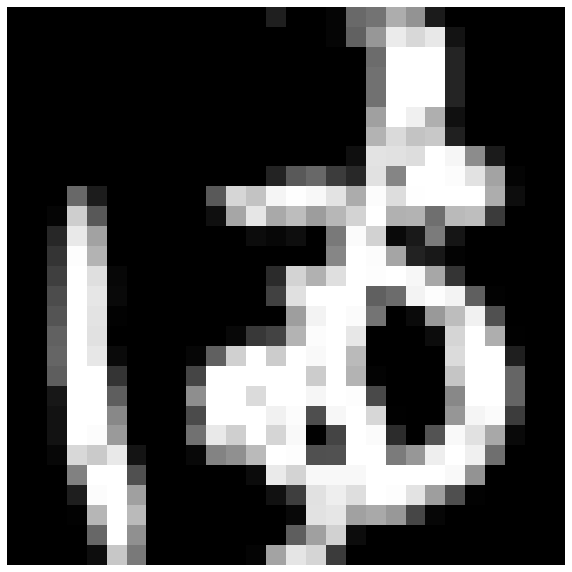

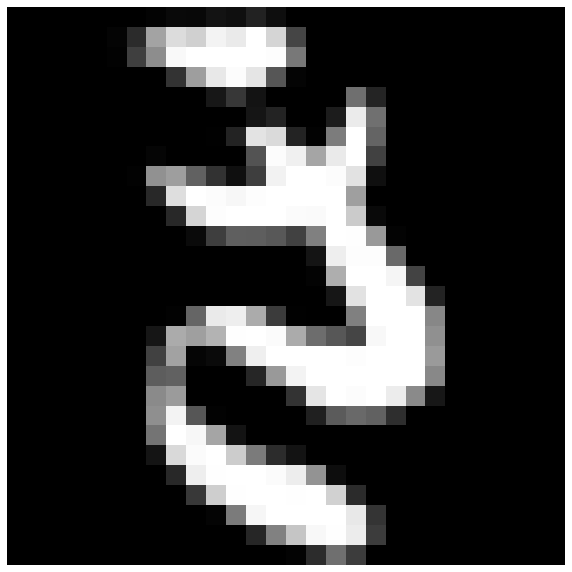

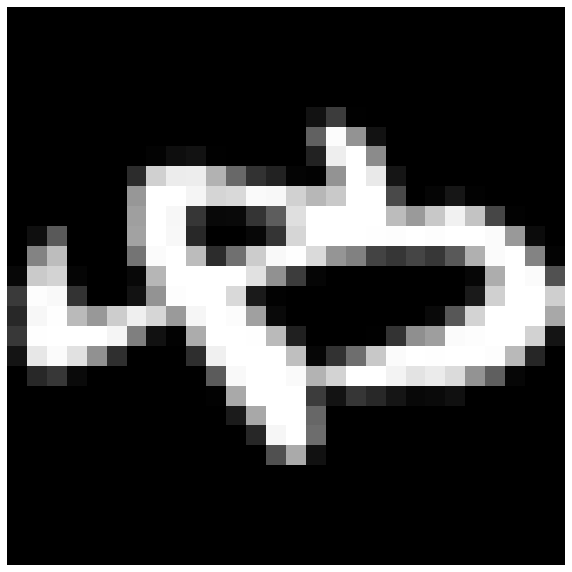

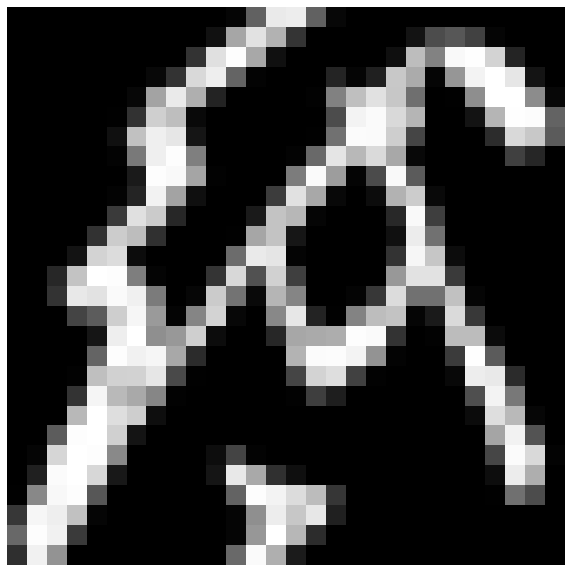

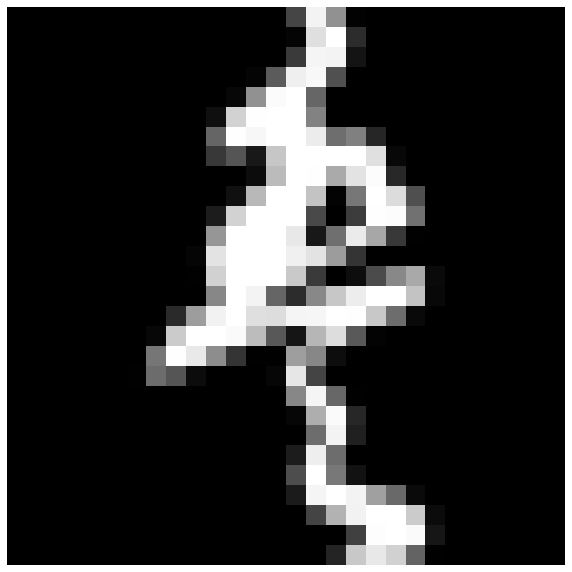

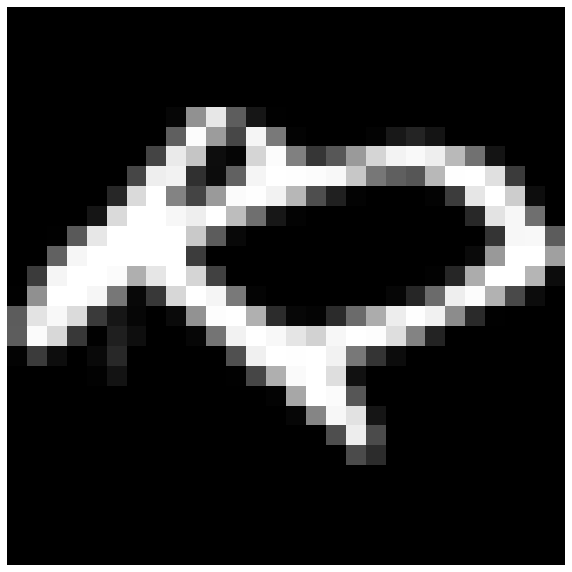

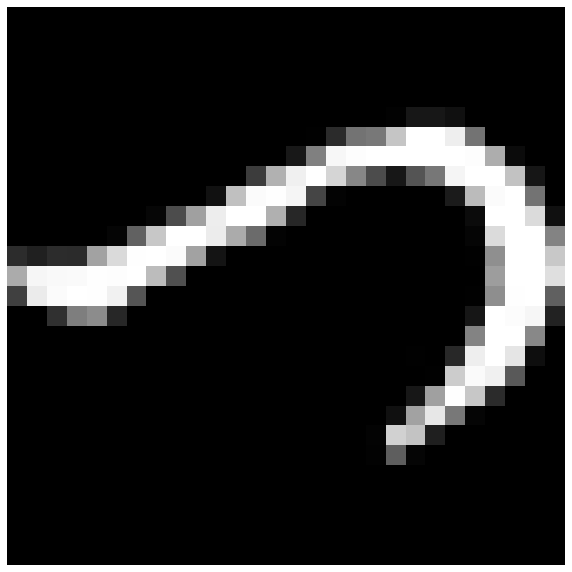

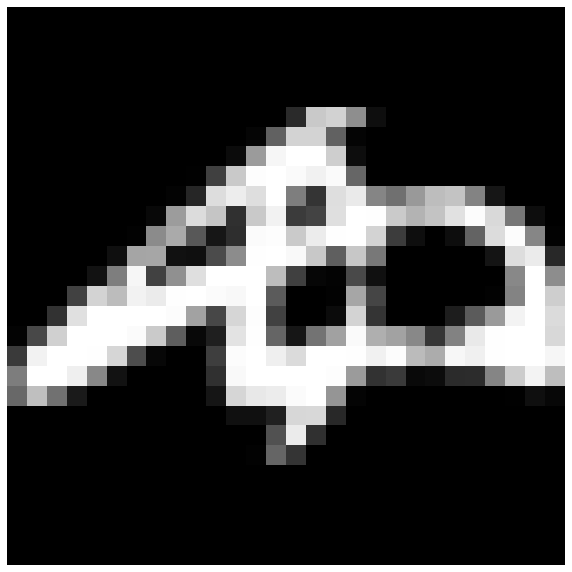

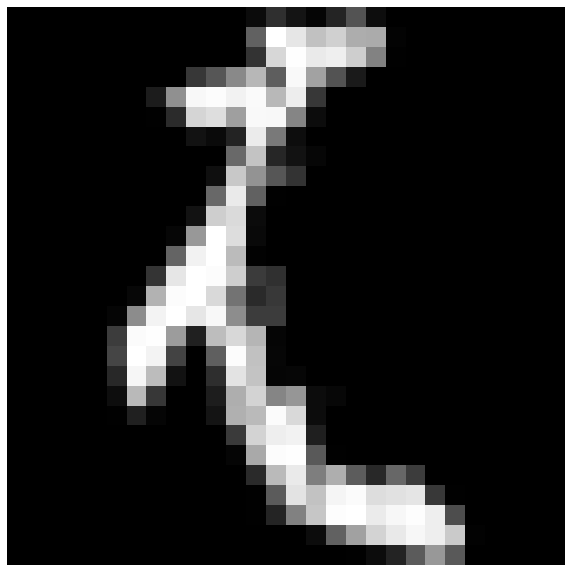

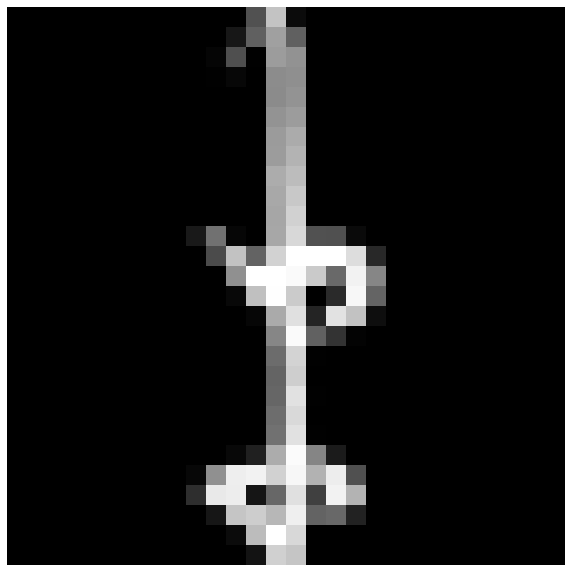

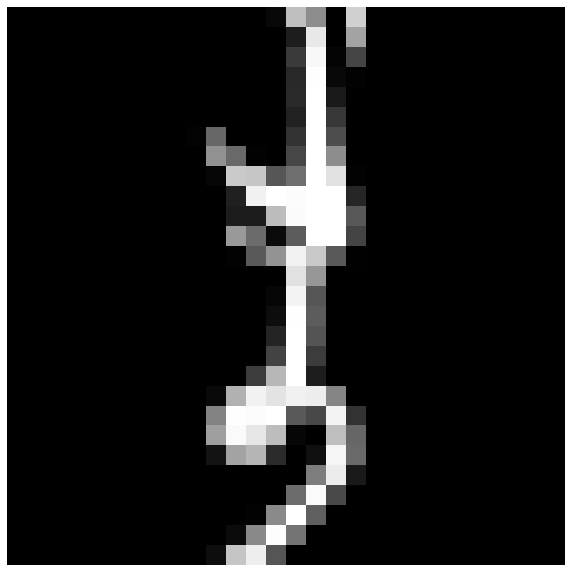

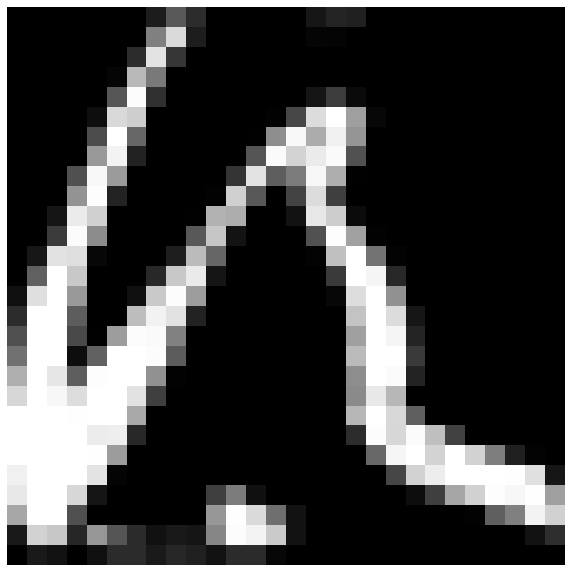

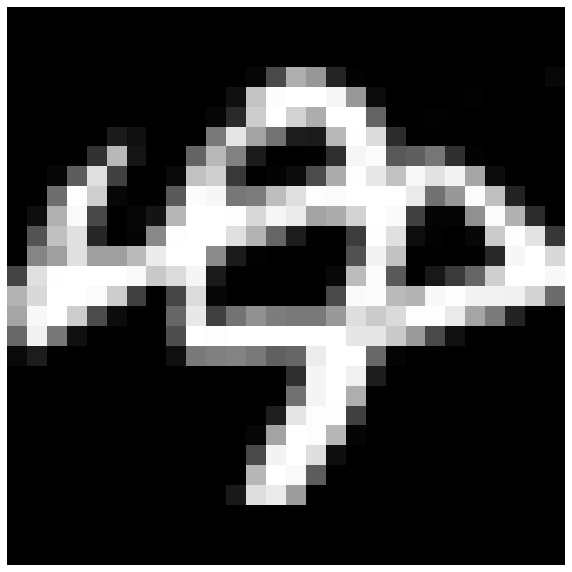

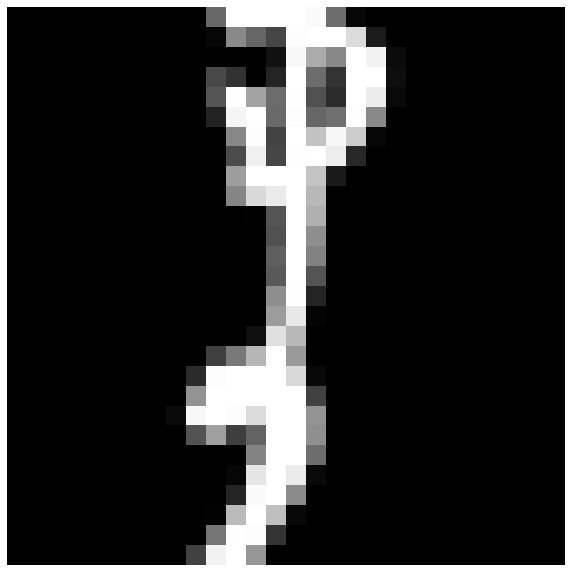

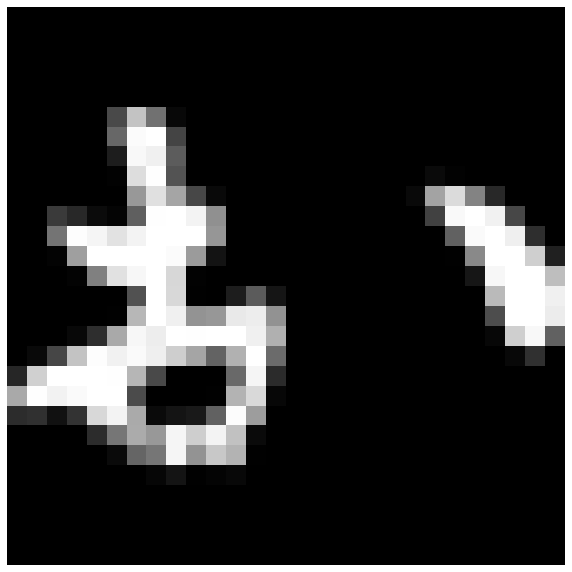

In [ ]:
for i in range(30):
    plot(X[i,0,:,:])

In [ ]:
Y

array([8, 7, 0, ..., 0, 4, 9])

In [ ]:
X[0:25,0,:,:].shape

(25, 28, 28)

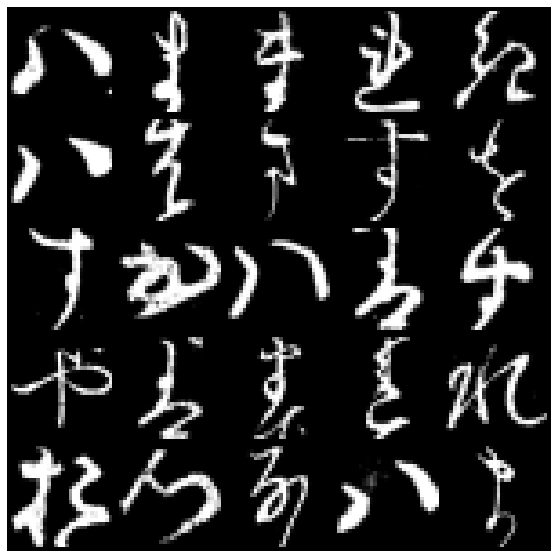

In [ ]:
montage_plot(X[125:150,0,:,:])

In [ ]:
X.shape[0]

60000

In [ ]:
X_test.shape

(10000, 1, 28, 28)

In [ ]:
X.shape[0]

60000

In [ ]:
X_test.shape[0]

10000

In [ ]:
X = X.reshape(X.shape[0],784)
X_test = X_test.reshape(X_test.shape[0],784)

In [ ]:
X.shape,X_test.shape

((60000, 784), (10000, 784))

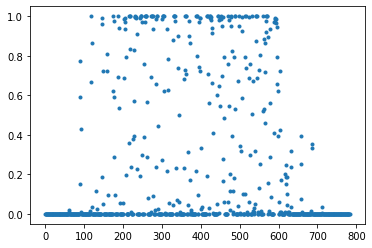

In [ ]:
plt.plot(X[100],'.')

(array([548.,  11.,  17.,  18.,  15.,  17.,  16.,  14.,  16., 112.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

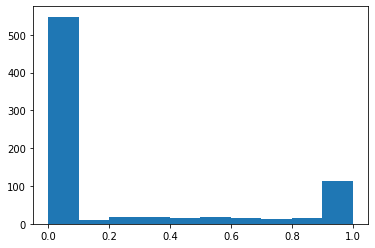

In [ ]:
plt.hist(X[0])

In [ ]:
X = GPU_data(X)
Y = GPU_data(Y)
X_test = GPU_data(X_test)
Y_test = GPU_data(Y_test)

In [ ]:
url = 'https://github.com/williamedwardhahn/ComplexSystems/raw/main/W.data'  
wget.download(url,"W.data")

'W (2).data'

In [ ]:
W = torch.load("W.data")

In [ ]:
W.shape

torch.Size([784, 10])

In [ ]:
X.shape

torch.Size([60000, 784])

In [ ]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 100)
    plt.show()

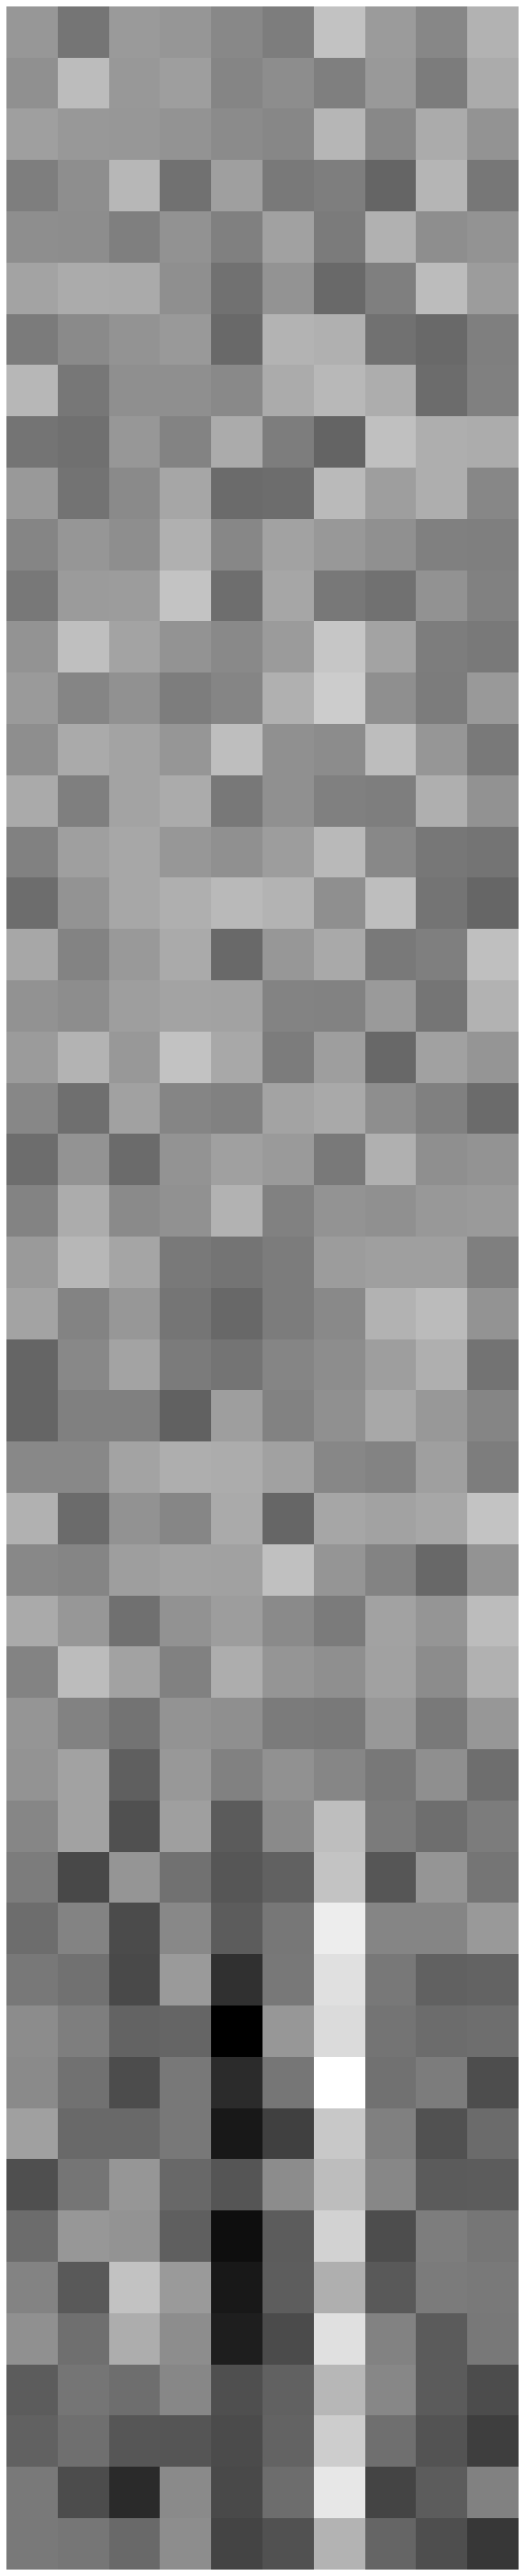

In [ ]:

plot(W[0:50,:10])

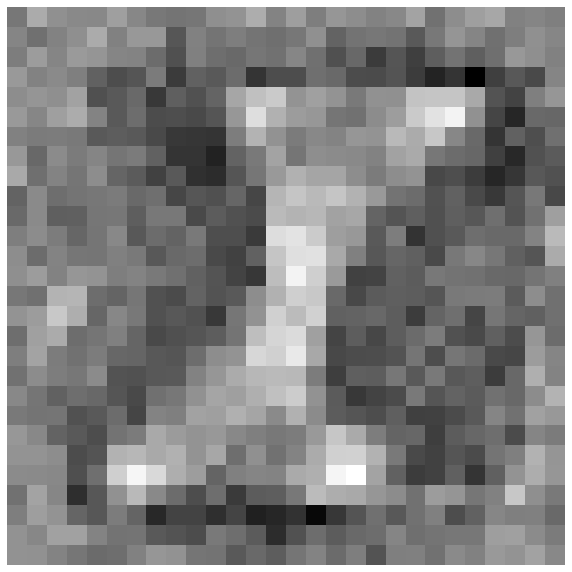

In [ ]:
plot(W[:,1].reshape(28,28))

In [ ]:
X.shape

torch.Size([60000, 784])

In [ ]:
b = 1000

def get_batch(mode):
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
x,y = get_batch('train')

In [ ]:
x.shape

torch.Size([1000, 784])

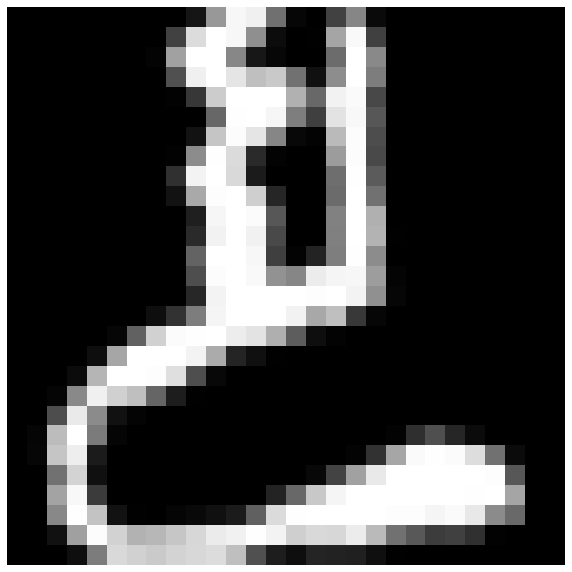

In [ ]:
plot(x[0].reshape(28,28))

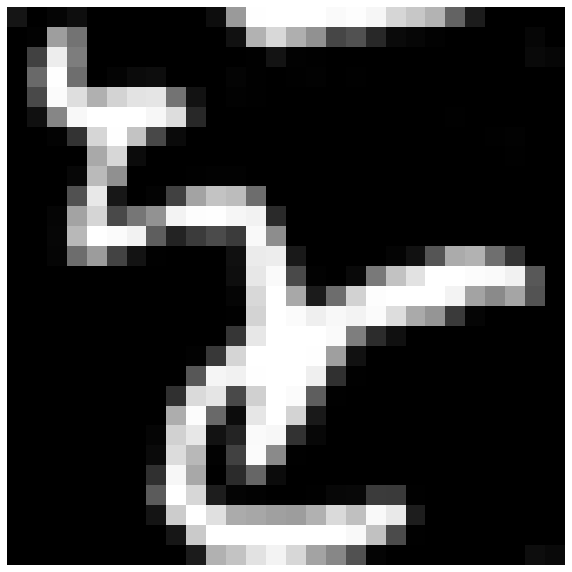

In [ ]:
plot(x[1].reshape(28,28))

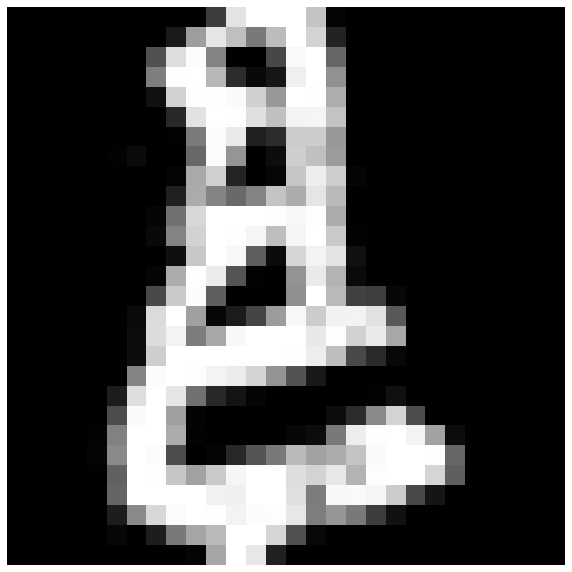

In [ ]:
plot(x[2].reshape(28,28))

In [ ]:
y

tensor([8., 9., 8., 0., 5., 4., 1., 9., 2., 8., 9., 0., 4., 7., 9., 8., 2., 9.,
        7., 7., 2., 2., 5., 6., 7., 3., 6., 0., 0., 1., 1., 2., 1., 0., 9., 1.,
        3., 5., 6., 1., 9., 2., 6., 7., 9., 5., 9., 2., 1., 7., 1., 1., 6., 8.,
        6., 9., 0., 0., 3., 5., 3., 8., 3., 5., 8., 2., 4., 1., 9., 5., 4., 3.,
        4., 3., 0., 6., 5., 3., 4., 3., 0., 9., 0., 9., 1., 2., 0., 5., 8., 6.,
        4., 8., 8., 5., 3., 4., 8., 2., 4., 5., 6., 1., 9., 3., 8., 0., 5., 2.,
        5., 4., 1., 7., 1., 4., 6., 8., 0., 1., 7., 4., 3., 4., 9., 7., 4., 4.,
        4., 5., 9., 2., 7., 6., 9., 7., 6., 8., 3., 0., 9., 6., 5., 5., 8., 8.,
        5., 5., 6., 8., 0., 7., 3., 5., 8., 4., 4., 8., 8., 8., 6., 1., 8., 1.,
        1., 5., 1., 1., 6., 2., 3., 5., 0., 7., 0., 1., 1., 7., 7., 7., 2., 5.,
        2., 3., 2., 2., 4., 5., 9., 6., 5., 0., 7., 6., 5., 6., 7., 9., 5., 3.,
        8., 0., 4., 6., 2., 1., 3., 0., 3., 2., 8., 4., 2., 5., 0., 8., 6., 7.,
        8., 6., 1., 3., 8., 0., 1., 1., 

In [ ]:
x.shape, W.shape

(torch.Size([1000, 784]), torch.Size([784, 10]))

In [ ]:
torch.matmul(x,W).shape

torch.Size([1000, 10])

In [ ]:
(x@W).shape

torch.Size([1000, 10])

In [ ]:
%%timeit
x@W

20.3 µs ± 566 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
X@W

tensor([[ -6.7411, -30.6675,  -4.6133,  ..., -18.6603, -21.3336, -11.8581],
        [ -9.2111, -17.2542,   3.0195,  ..., -13.0820, -15.9574,  -3.6528],
        [ -9.9539, -32.6373, -11.0621,  ..., -16.7772, -22.7081, -39.3788],
        ...,
        [-13.9413, -34.4255,  12.8566,  ..., -17.9977, -24.1829, -36.7925],
        [-20.0897, -28.0183,  11.9711,  ..., -14.0910,  -9.7690, -29.2732],
        [ -8.3954, -21.9395,   1.6386,  ..., -20.9600,  -7.4672,  -9.4834]],
       device='cuda:0', grad_fn=<MmBackward0>)

https://eleif.net/clicktimer.html

In [ ]:
x@W

tensor([[-2.2902e+01, -2.8504e+01, -4.2764e+00,  ..., -1.5259e+01,
         -1.3753e+01,  8.1068e+00],
        [-1.6706e+01, -1.5412e+01, -9.8030e+00,  ...,  6.1350e+00,
         -8.8334e+00, -3.2332e+00],
        [-1.1790e+01, -1.6894e+01, -4.0156e+00,  ..., -7.4194e+00,
         -3.5881e+00, -2.1398e+00],
        ...,
        [-1.6997e+01, -2.0560e+01, -5.0231e+00,  ..., -1.6751e+01,
          9.9668e+00, -1.6226e+01],
        [-2.4872e+00,  3.3921e+00, -8.5378e-03,  ...,  4.0232e+00,
         -4.5512e+00, -1.5323e+00],
        [-4.9200e+00, -6.8196e+00, -2.6513e+00,  ..., -2.7097e+00,
          3.5619e+00,  5.4112e-01]], device='cuda:0', grad_fn=<MmBackward0>)

In [ ]:
y2 = x@W 

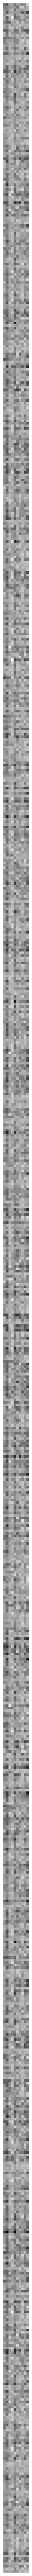

In [ ]:
plot(y2)

In [ ]:
y

tensor([8., 9., 8., 0., 5., 4., 1., 9., 2., 8., 9., 0., 4., 7., 9., 8., 2., 9.,
        7., 7., 2., 2., 5., 6., 7., 3., 6., 0., 0., 1., 1., 2., 1., 0., 9., 1.,
        3., 5., 6., 1., 9., 2., 6., 7., 9., 5., 9., 2., 1., 7., 1., 1., 6., 8.,
        6., 9., 0., 0., 3., 5., 3., 8., 3., 5., 8., 2., 4., 1., 9., 5., 4., 3.,
        4., 3., 0., 6., 5., 3., 4., 3., 0., 9., 0., 9., 1., 2., 0., 5., 8., 6.,
        4., 8., 8., 5., 3., 4., 8., 2., 4., 5., 6., 1., 9., 3., 8., 0., 5., 2.,
        5., 4., 1., 7., 1., 4., 6., 8., 0., 1., 7., 4., 3., 4., 9., 7., 4., 4.,
        4., 5., 9., 2., 7., 6., 9., 7., 6., 8., 3., 0., 9., 6., 5., 5., 8., 8.,
        5., 5., 6., 8., 0., 7., 3., 5., 8., 4., 4., 8., 8., 8., 6., 1., 8., 1.,
        1., 5., 1., 1., 6., 2., 3., 5., 0., 7., 0., 1., 1., 7., 7., 7., 2., 5.,
        2., 3., 2., 2., 4., 5., 9., 6., 5., 0., 7., 6., 5., 6., 7., 9., 5., 3.,
        8., 0., 4., 6., 2., 1., 3., 0., 3., 2., 8., 4., 2., 5., 0., 8., 6., 7.,
        8., 6., 1., 3., 8., 0., 1., 1., 

In [ ]:
one_hot(y)

/usr/local/lib/python3.7/dist-packages/mpcr/__init__.py:144: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))


tensor([[0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.]], device='cuda:0')

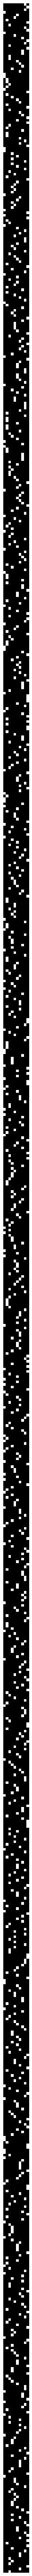

In [ ]:
plot(one_hot(y))

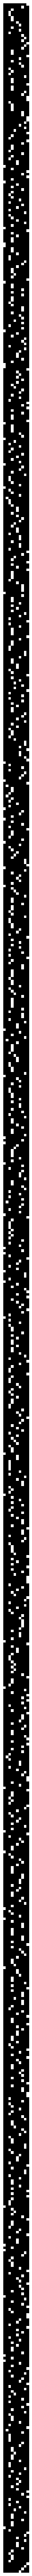

In [ ]:
plot(one_hot(torch.argmax(y2,1)))

In [ ]:
y

tensor([8., 9., 8., 0., 5., 4., 1., 9., 2., 8., 9., 0., 4., 7., 9., 8., 2., 9.,
        7., 7., 2., 2., 5., 6., 7., 3., 6., 0., 0., 1., 1., 2., 1., 0., 9., 1.,
        3., 5., 6., 1., 9., 2., 6., 7., 9., 5., 9., 2., 1., 7., 1., 1., 6., 8.,
        6., 9., 0., 0., 3., 5., 3., 8., 3., 5., 8., 2., 4., 1., 9., 5., 4., 3.,
        4., 3., 0., 6., 5., 3., 4., 3., 0., 9., 0., 9., 1., 2., 0., 5., 8., 6.,
        4., 8., 8., 5., 3., 4., 8., 2., 4., 5., 6., 1., 9., 3., 8., 0., 5., 2.,
        5., 4., 1., 7., 1., 4., 6., 8., 0., 1., 7., 4., 3., 4., 9., 7., 4., 4.,
        4., 5., 9., 2., 7., 6., 9., 7., 6., 8., 3., 0., 9., 6., 5., 5., 8., 8.,
        5., 5., 6., 8., 0., 7., 3., 5., 8., 4., 4., 8., 8., 8., 6., 1., 8., 1.,
        1., 5., 1., 1., 6., 2., 3., 5., 0., 7., 0., 1., 1., 7., 7., 7., 2., 5.,
        2., 3., 2., 2., 4., 5., 9., 6., 5., 0., 7., 6., 5., 6., 7., 9., 5., 3.,
        8., 0., 4., 6., 2., 1., 3., 0., 3., 2., 8., 4., 2., 5., 0., 8., 6., 7.,
        8., 6., 1., 3., 8., 0., 1., 1., 

In [ ]:
torch.argmax(y2,1)

tensor([9, 7, 3, 2, 2, 3, 3, 5, 6, 3, 6, 2, 7, 8, 7, 9, 8, 7, 3, 3, 9, 6, 3, 6,
        7, 2, 3, 2, 8, 3, 3, 9, 3, 3, 8, 7, 9, 9, 2, 3, 3, 3, 7, 7, 9, 9, 8, 6,
        8, 4, 9, 3, 2, 9, 7, 3, 3, 2, 7, 3, 2, 5, 5, 0, 3, 9, 7, 9, 3, 0, 5, 3,
        7, 3, 2, 3, 6, 2, 7, 5, 2, 8, 2, 3, 5, 8, 3, 0, 9, 3, 5, 3, 3, 0, 0, 3,
        3, 5, 2, 2, 8, 7, 5, 3, 3, 4, 3, 9, 0, 3, 3, 7, 3, 7, 3, 3, 2, 3, 7, 7,
        3, 6, 7, 4, 7, 2, 7, 0, 5, 3, 8, 7, 8, 2, 8, 6, 5, 5, 7, 3, 0, 0, 9, 5,
        6, 5, 7, 5, 3, 4, 7, 6, 3, 6, 2, 9, 7, 9, 3, 7, 3, 3, 9, 0, 3, 3, 3, 6,
        7, 0, 4, 2, 6, 3, 2, 7, 5, 3, 6, 0, 7, 6, 3, 8, 2, 2, 3, 6, 0, 2, 3, 6,
        1, 2, 2, 3, 5, 5, 3, 5, 7, 6, 4, 3, 5, 5, 2, 6, 6, 3, 6, 6, 2, 9, 7, 4,
        3, 9, 3, 5, 9, 3, 3, 3, 2, 5, 7, 7, 7, 0, 7, 3, 3, 6, 3, 5, 3, 8, 6, 2,
        9, 2, 6, 3, 3, 3, 9, 6, 3, 3, 2, 2, 8, 8, 6, 3, 3, 5, 5, 2, 3, 9, 3, 6,
        4, 7, 4, 9, 2, 7, 2, 7, 3, 5, 3, 3, 8, 7, 5, 8, 3, 5, 2, 3, 3, 2, 4, 8,
        8, 6, 9, 6, 6, 8, 9, 0, 2, 7, 2,

In [ ]:
torch.sum(y == torch.argmax(y2,1))/b

tensor(0.0680, device='cuda:0')

In [ ]:
X.shape

torch.Size([60000, 784])

In [ ]:
X@W

tensor([[ -6.7411, -30.6675,  -4.6133,  ..., -18.6603, -21.3336, -11.8581],
        [ -9.2111, -17.2542,   3.0195,  ..., -13.0820, -15.9574,  -3.6528],
        [ -9.9539, -32.6373, -11.0621,  ..., -16.7772, -22.7081, -39.3788],
        ...,
        [-13.9413, -34.4255,  12.8566,  ..., -17.9977, -24.1829, -36.7925],
        [-20.0897, -28.0183,  11.9711,  ..., -14.0910,  -9.7690, -29.2732],
        [ -8.3954, -21.9395,   1.6386,  ..., -20.9600,  -7.4672,  -9.4834]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [ ]:
torch.argmax(X@W,1)

tensor([5, 2, 3,  ..., 2, 2, 5], device='cuda:0')

In [ ]:
Y

tensor([8., 7., 0.,  ..., 0., 4., 9.], device='cuda:0')

In [ ]:
torch.sum(torch.argmax(X@W,1) == Y)/60000

tensor(0.0789, device='cuda:0')

In [ ]:
X@W

tensor([[ -6.7411, -30.6675,  -4.6133,  ..., -18.6603, -21.3336, -11.8581],
        [ -9.2111, -17.2542,   3.0195,  ..., -13.0820, -15.9574,  -3.6528],
        [ -9.9539, -32.6373, -11.0621,  ..., -16.7772, -22.7081, -39.3788],
        ...,
        [-13.9413, -34.4255,  12.8566,  ..., -17.9977, -24.1829, -36.7925],
        [-20.0897, -28.0183,  11.9711,  ..., -14.0910,  -9.7690, -29.2732],
        [ -8.3954, -21.9395,   1.6386,  ..., -20.9600,  -7.4672,  -9.4834]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [ ]:
W.shape

torch.Size([784, 10])

In [ ]:
W[:,0].shape

torch.Size([784])

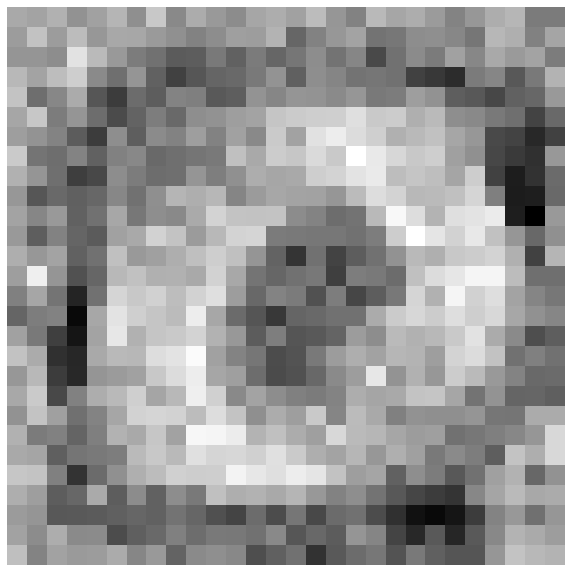

In [ ]:
plot(W[:,0].reshape(28,28))

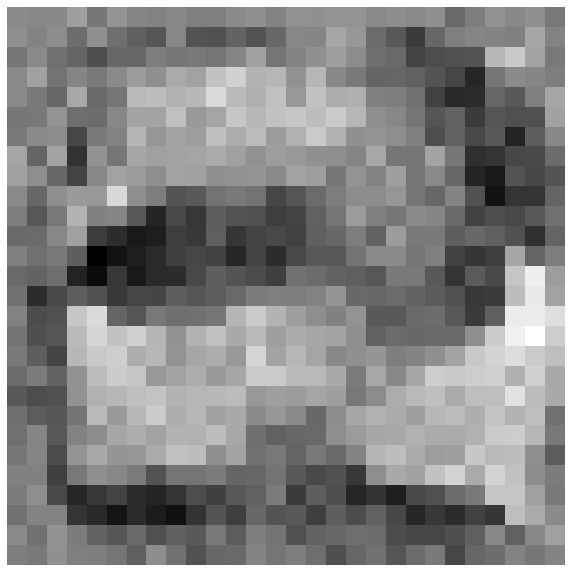

In [ ]:
plot(W[:,2].reshape(28,28))

In [ ]:
W.shape

torch.Size([784, 10])

In [ ]:
(W.T).shape

torch.Size([10, 784])

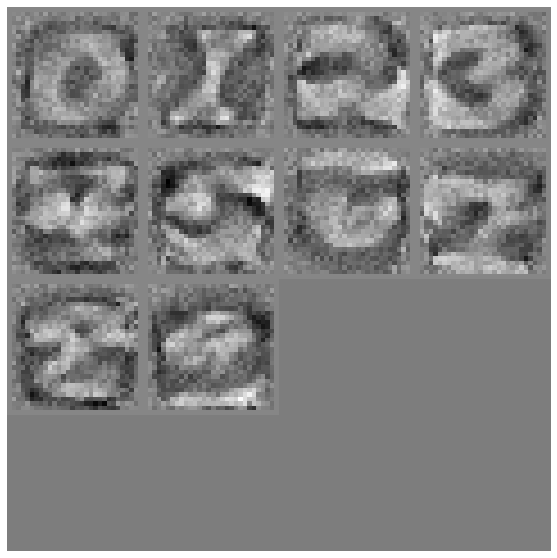

In [ ]:
montage_plot((W.T).reshape(10,28,28).cpu().detach().numpy())

In [ ]:
###################################################

In [ ]:
%%html
<img src ='https://miro.medium.com/max/1906/1*ReYpdIZ3ZSAPb2W8cJpkBg.jpeg'>

In [ ]:
%%html
<img src = 'https://miro.medium.com/max/3648/1*wz59MnXkXdWxrq_fkA2wew.png'>

In [ ]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [ ]:
def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [ ]:
%%html
<img src ='https://i.stack.imgur.com/fXqXs.png'>

In [ ]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [ ]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [ ]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [ ]:
X.shape

torch.Size([60000, 784])

In [ ]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
def model(x,w):

    return x@w[0]

In [ ]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    xt,yt = get_batch('test')

    acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train, "acc_test": acc_test})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


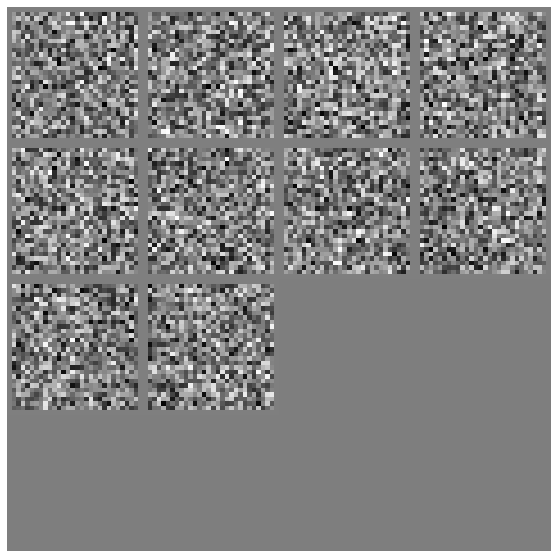

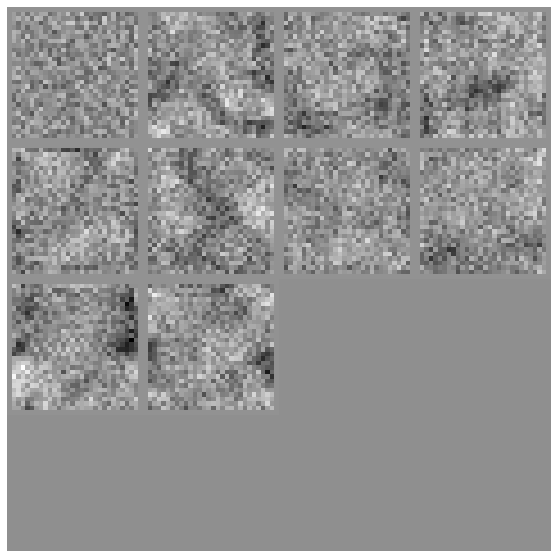

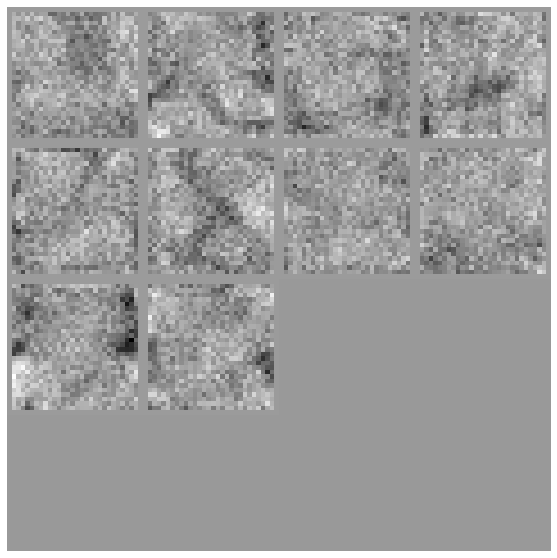

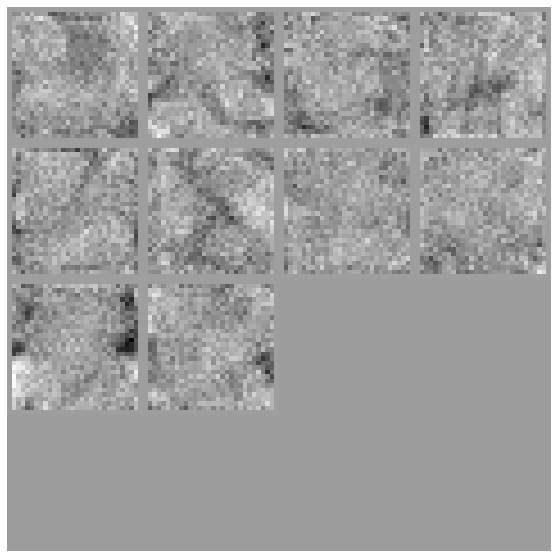

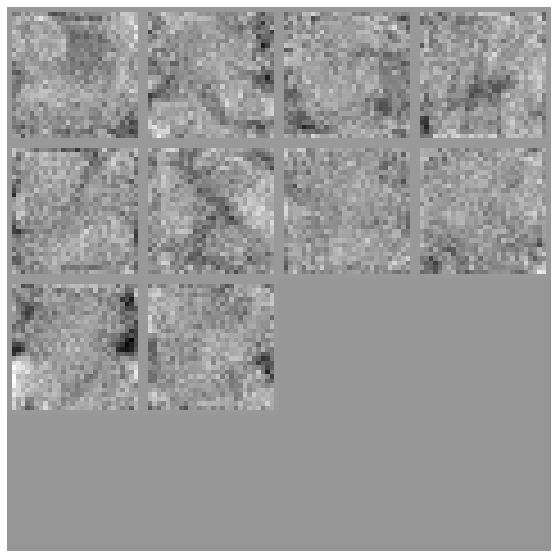

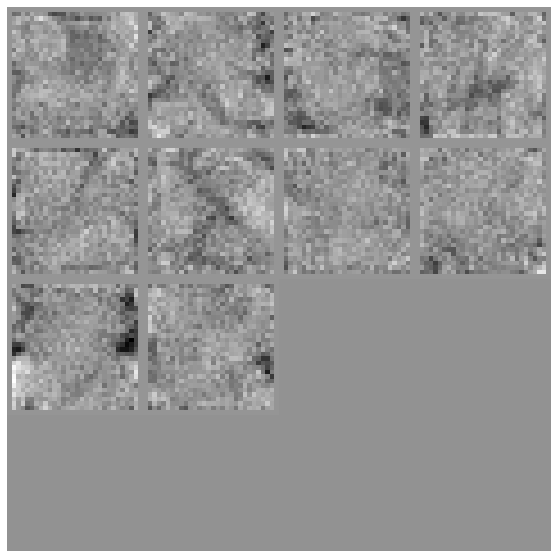

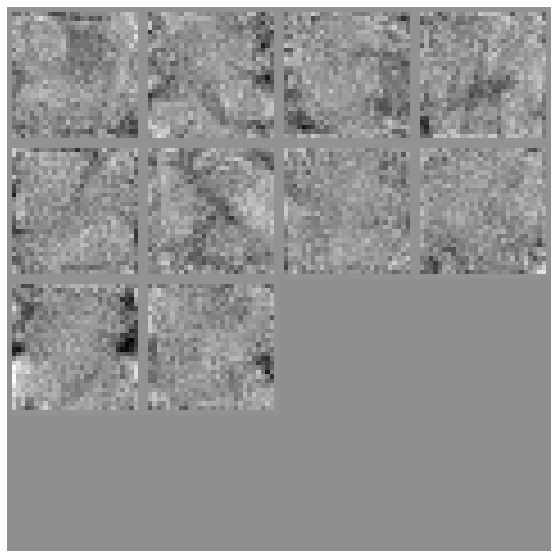

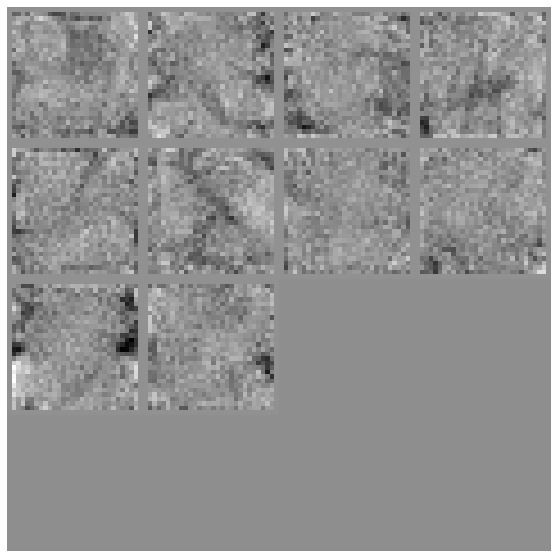

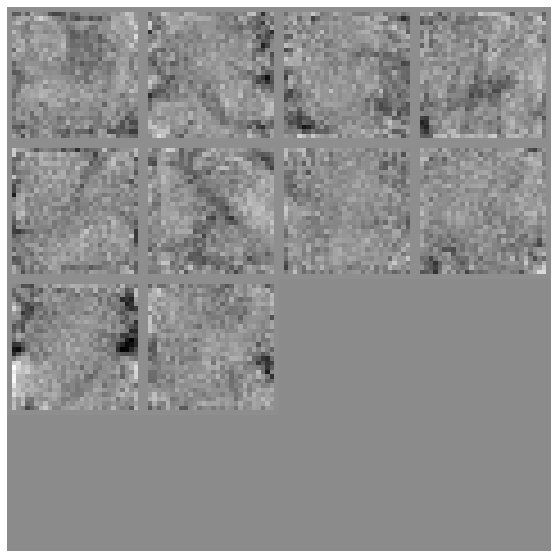

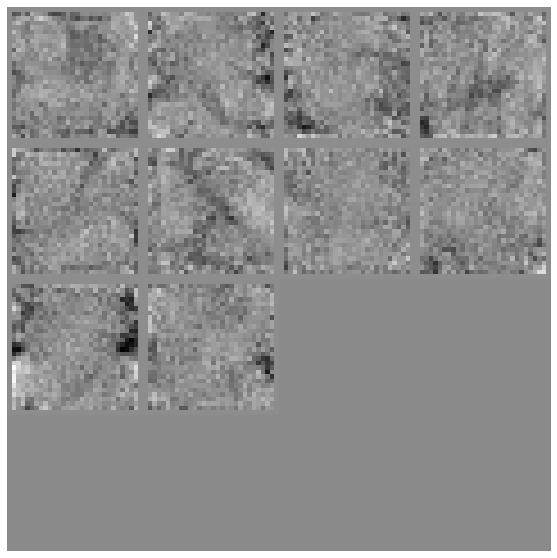

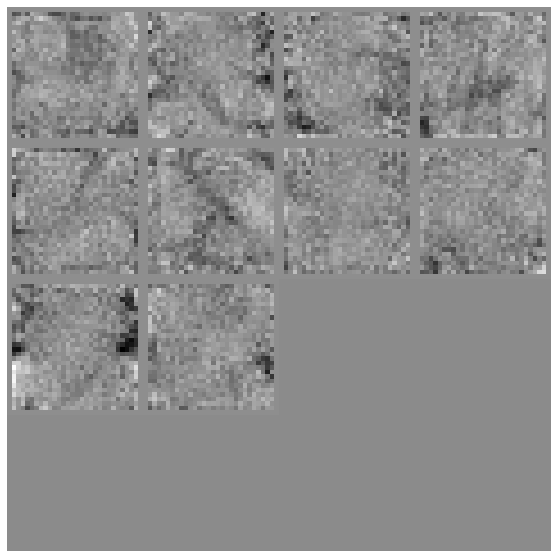

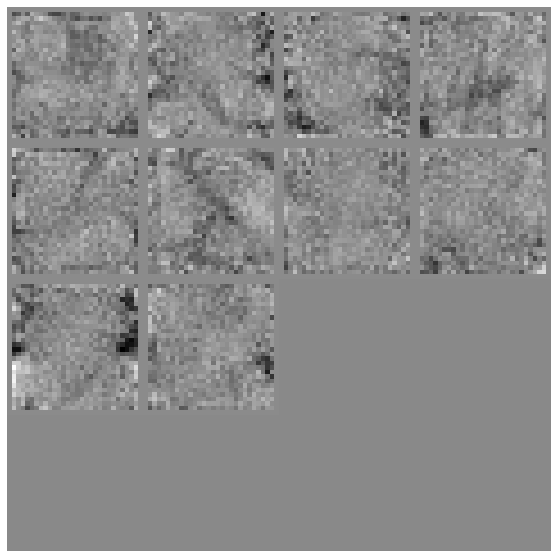

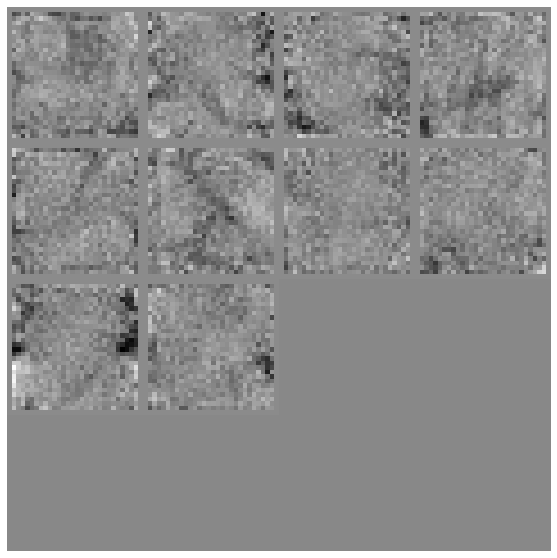

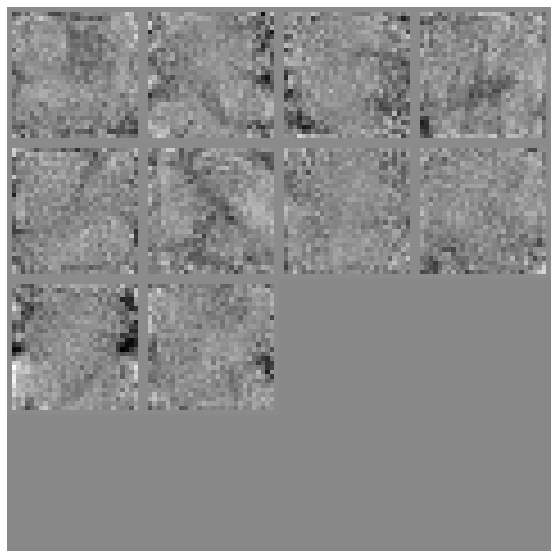

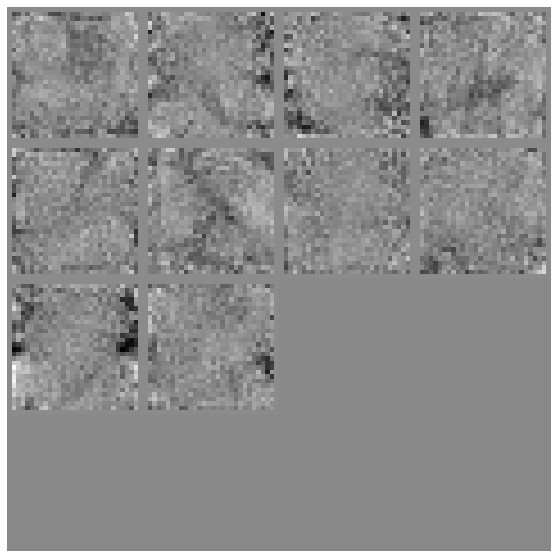

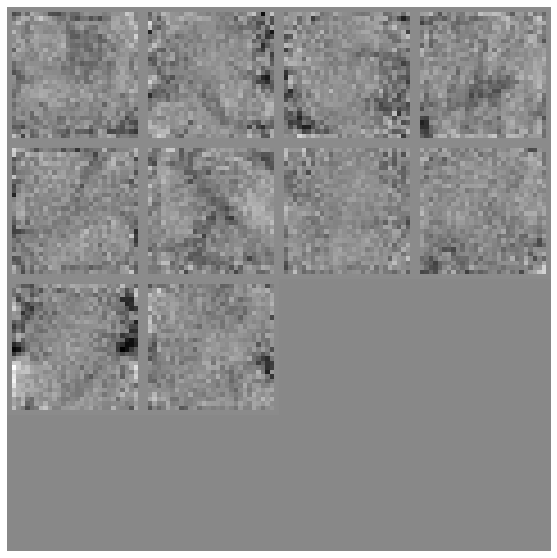

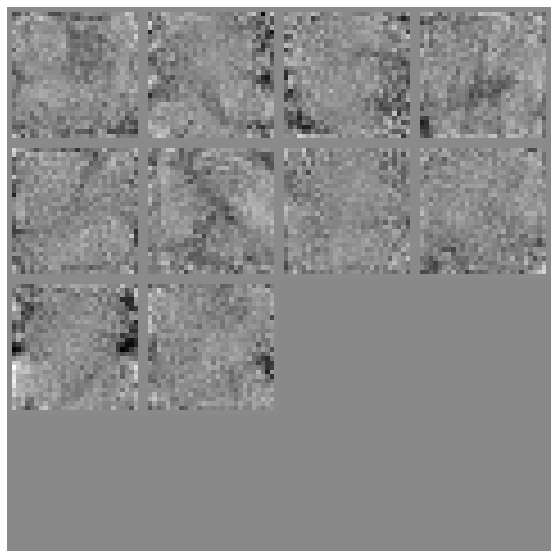

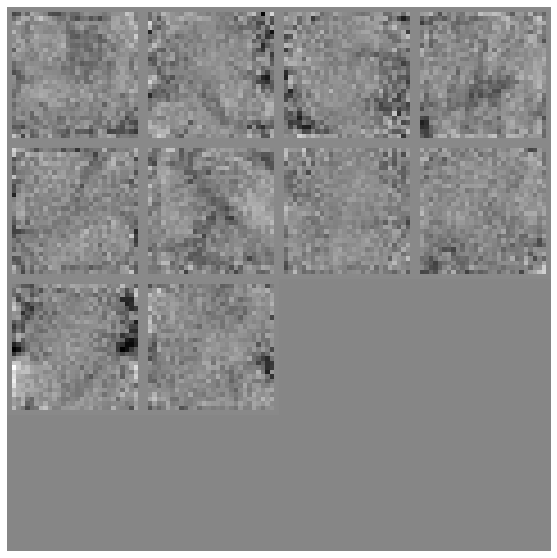

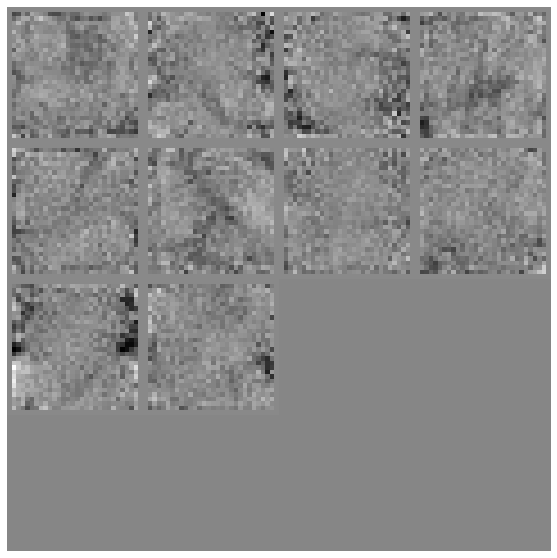

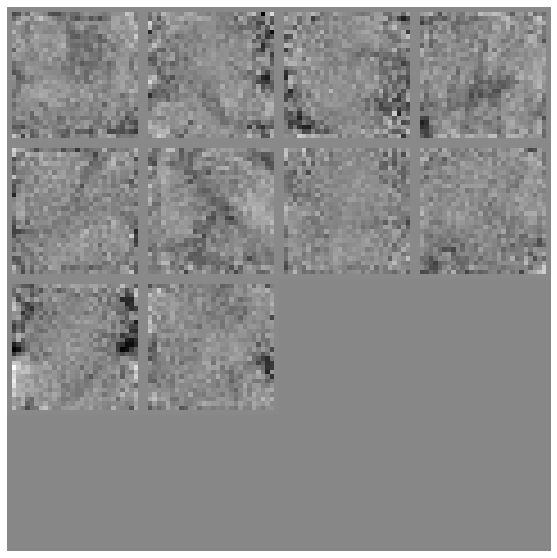

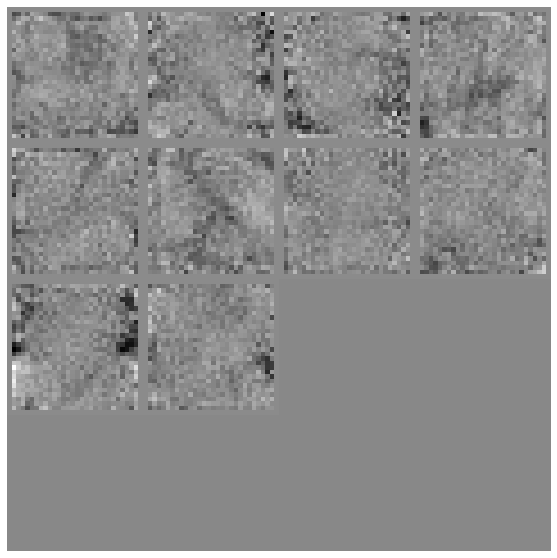

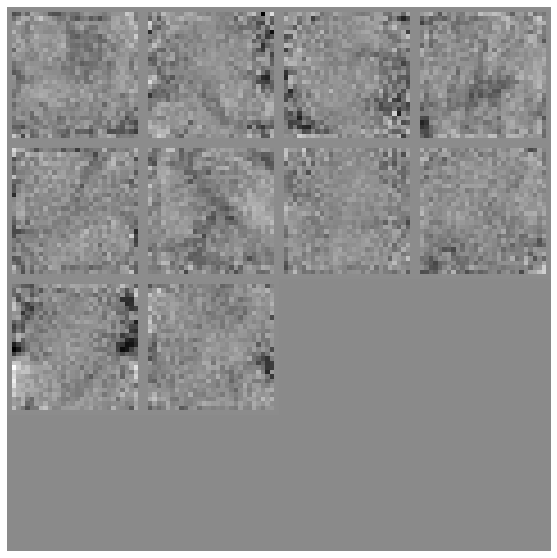

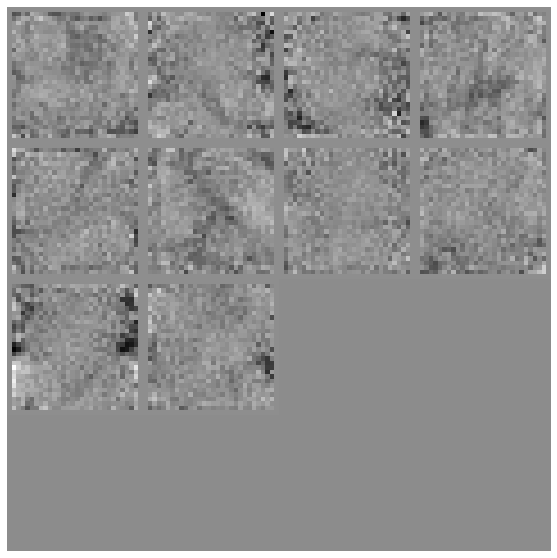

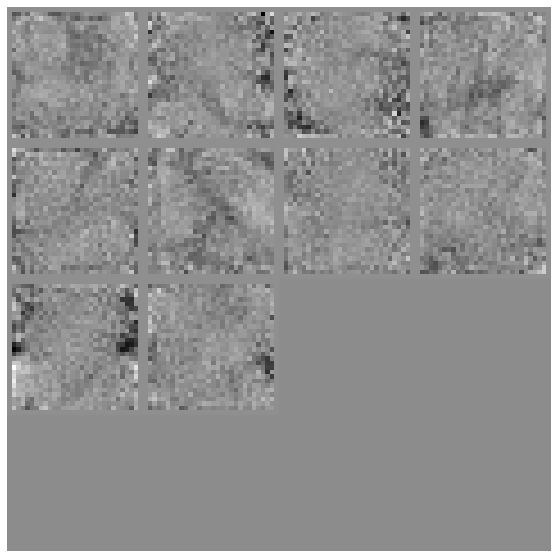

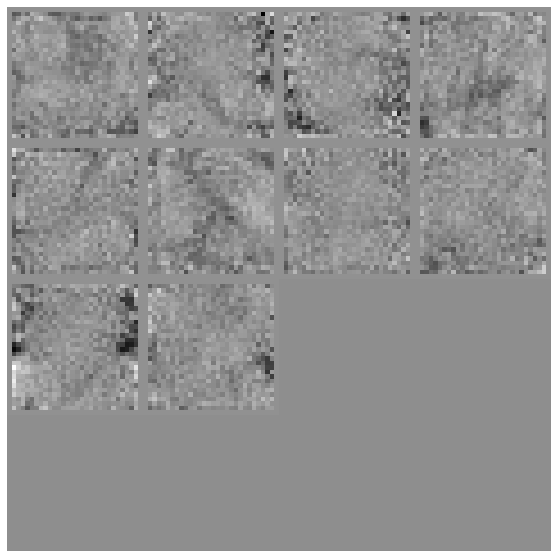

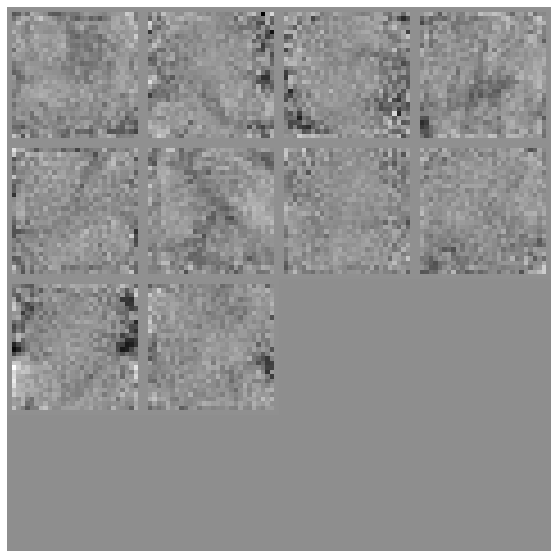

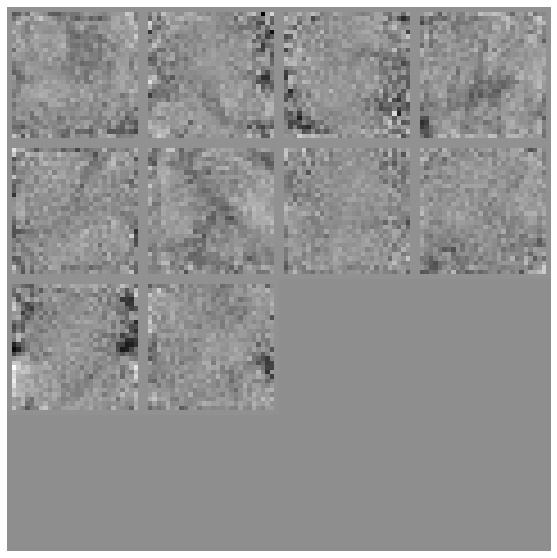

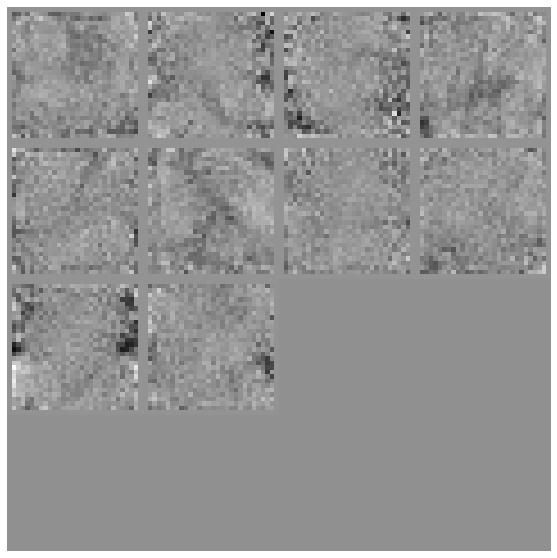

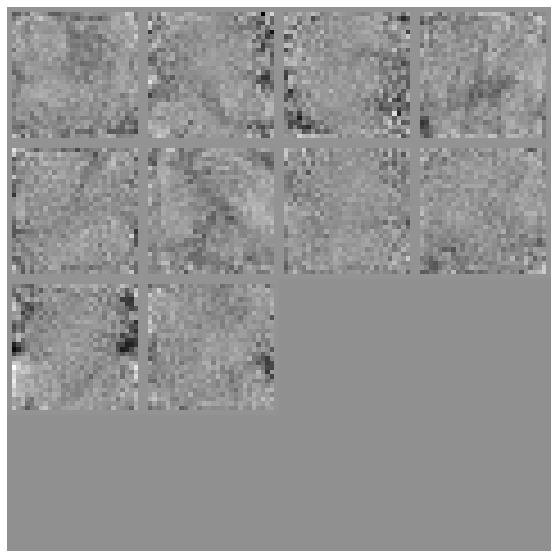

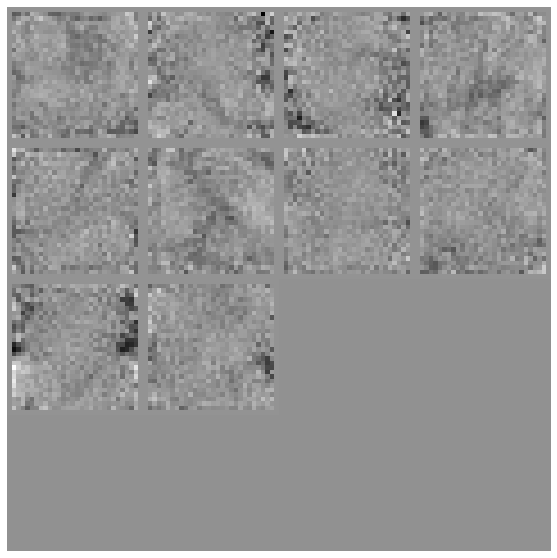

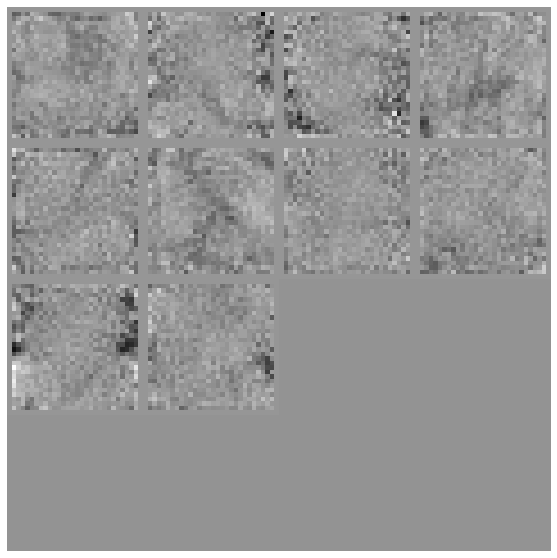

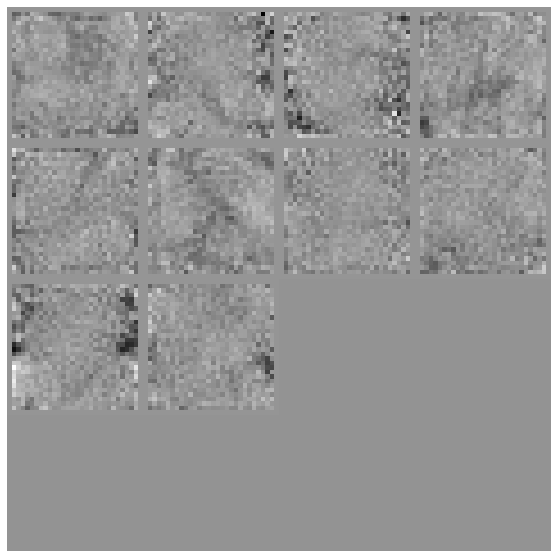

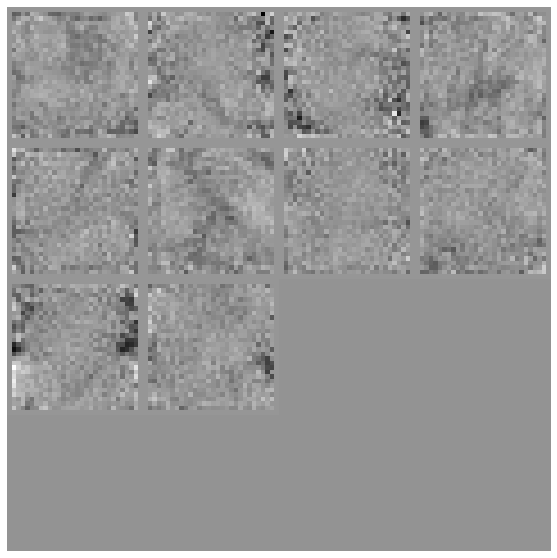

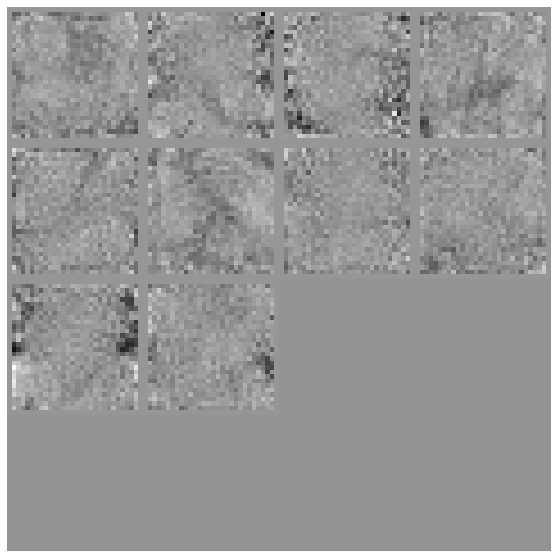

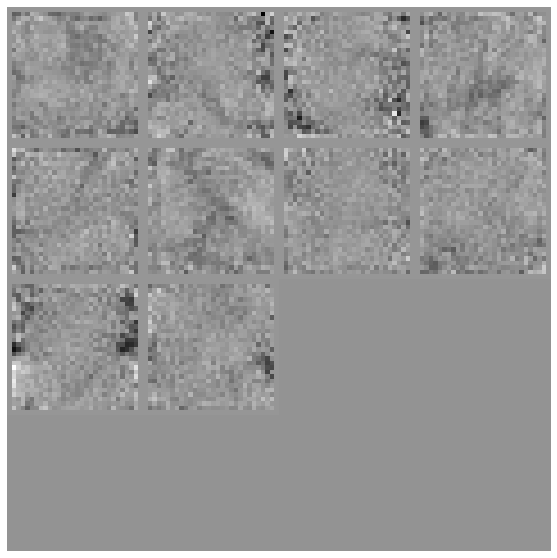

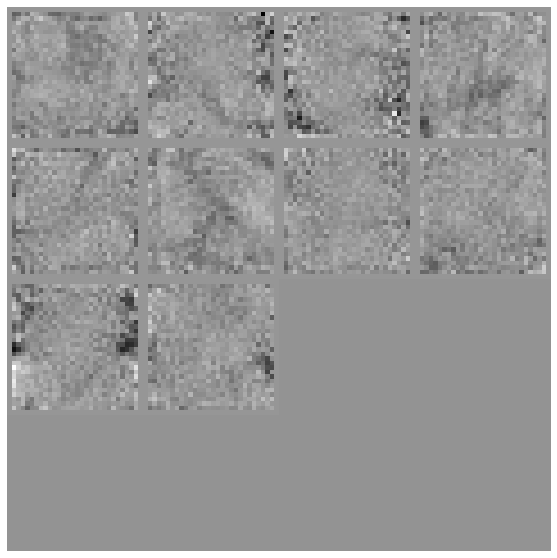

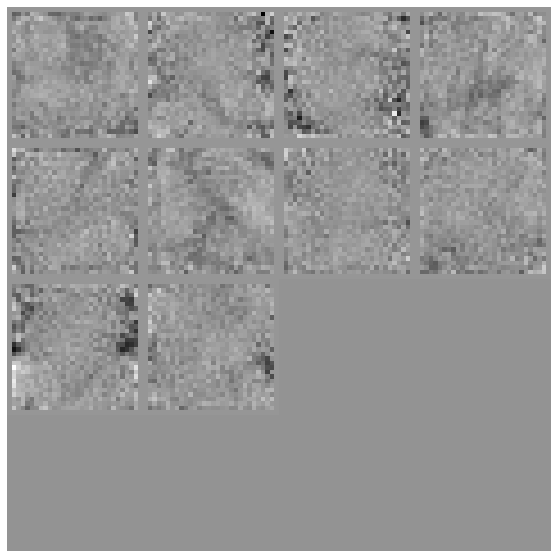

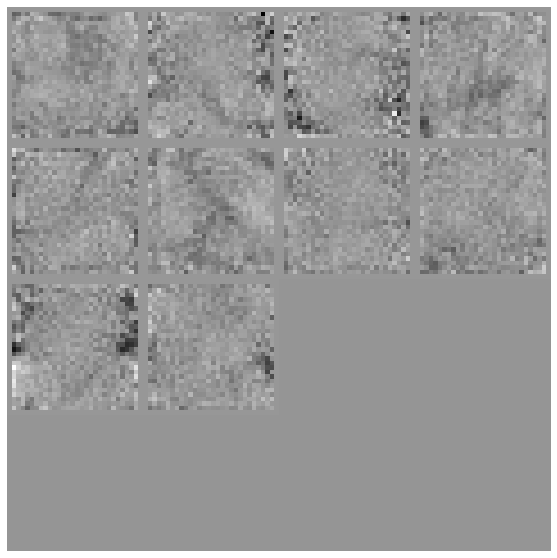

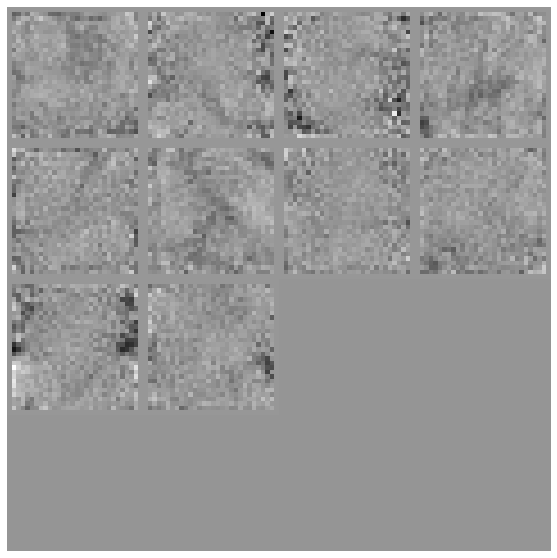

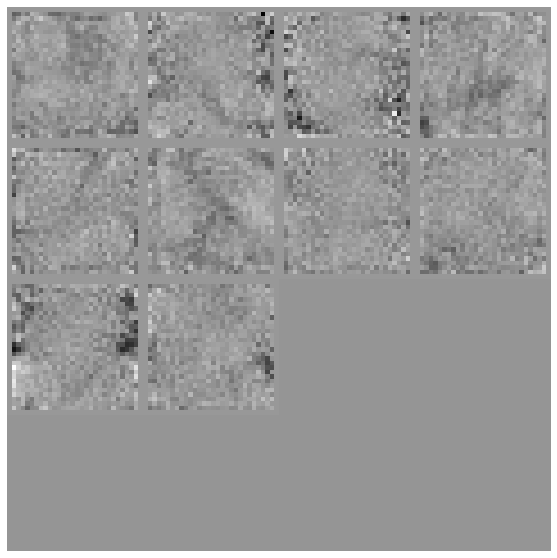

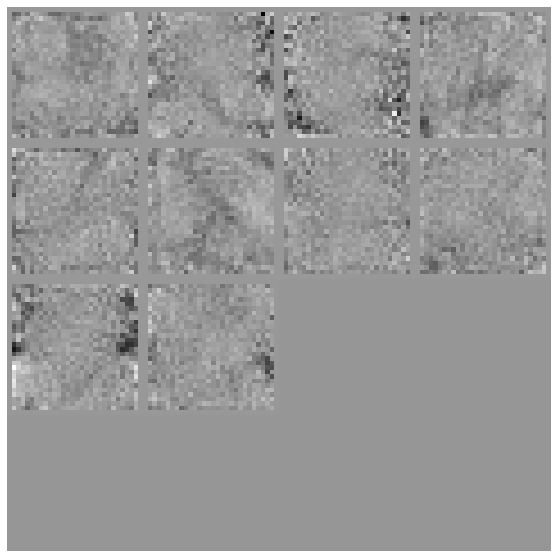

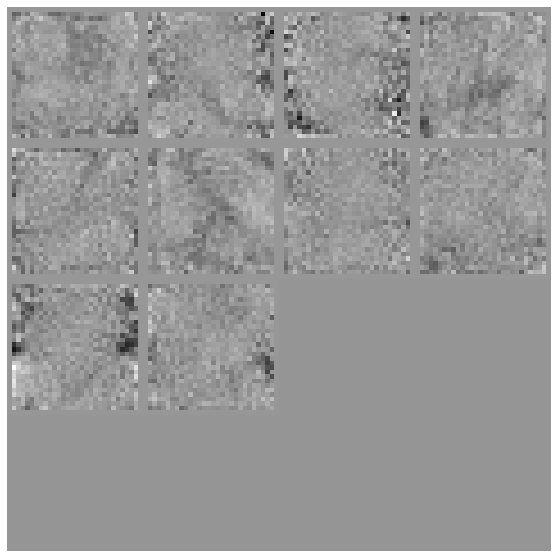

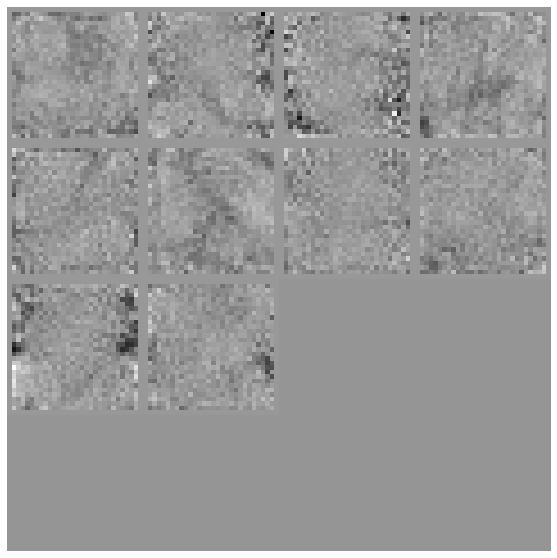

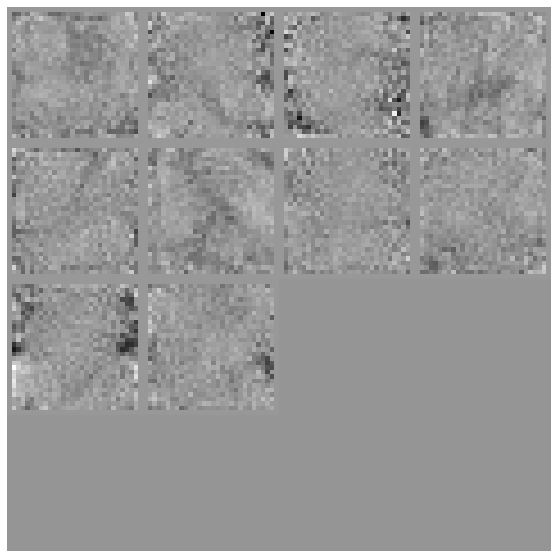

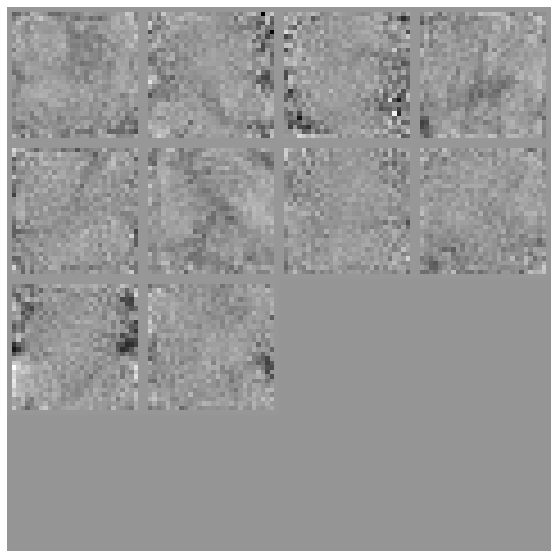

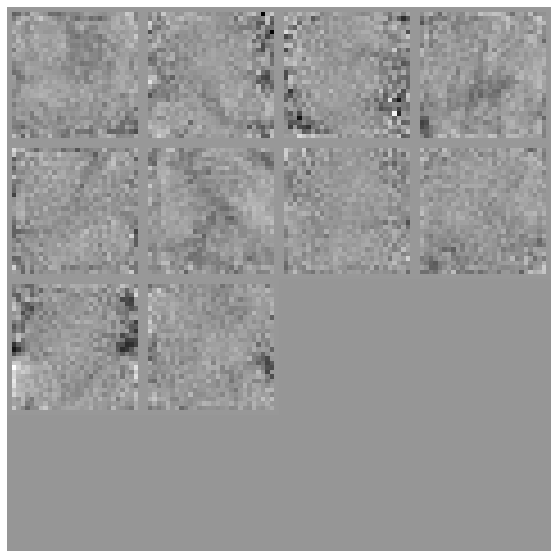

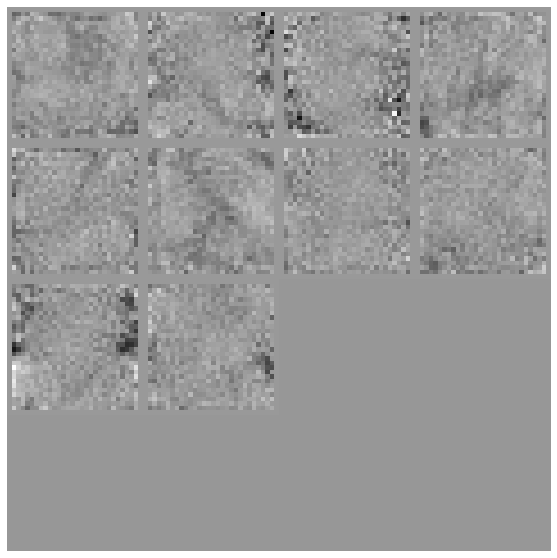

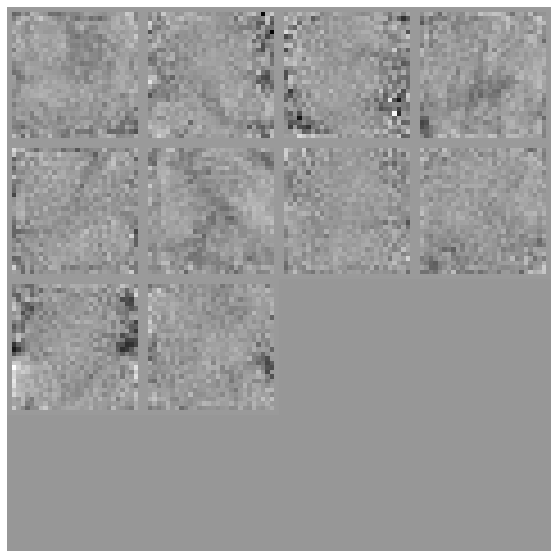

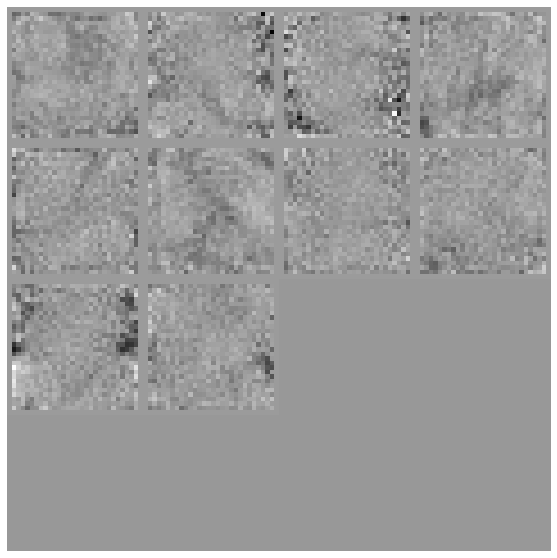

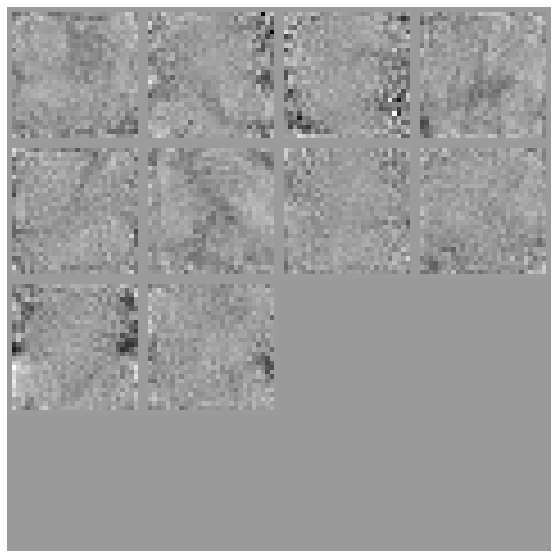

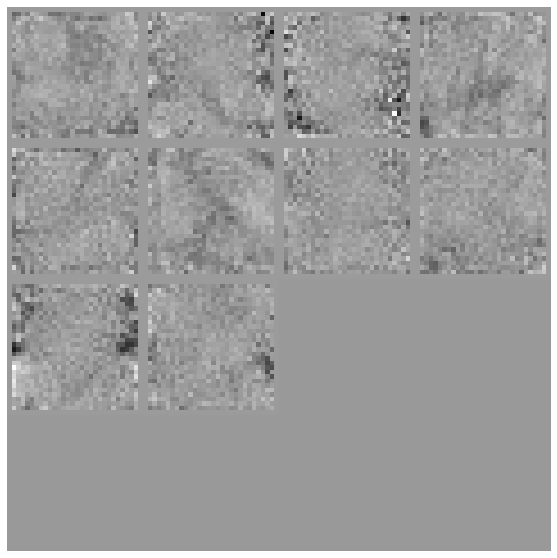

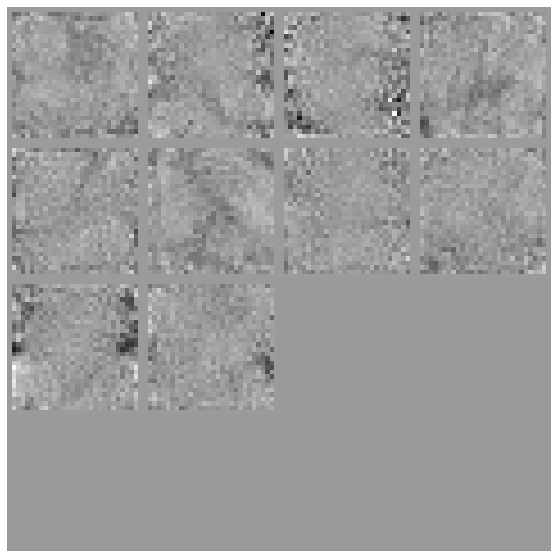

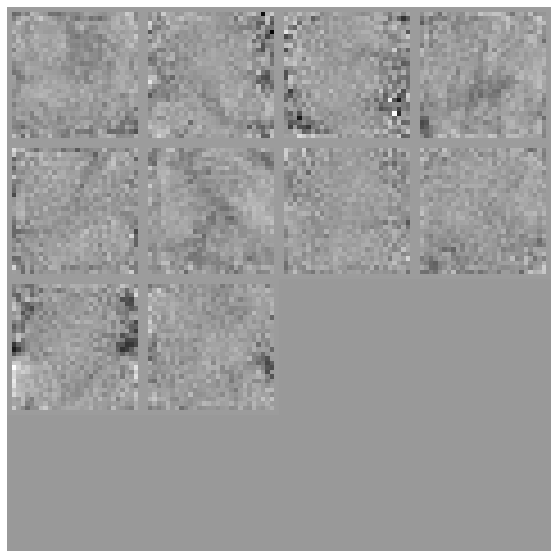

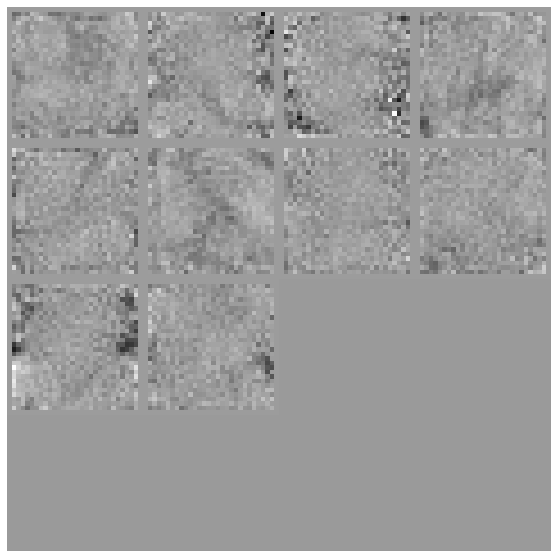

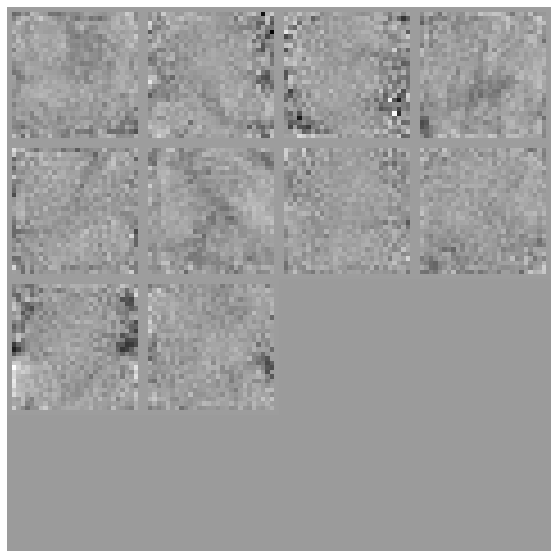

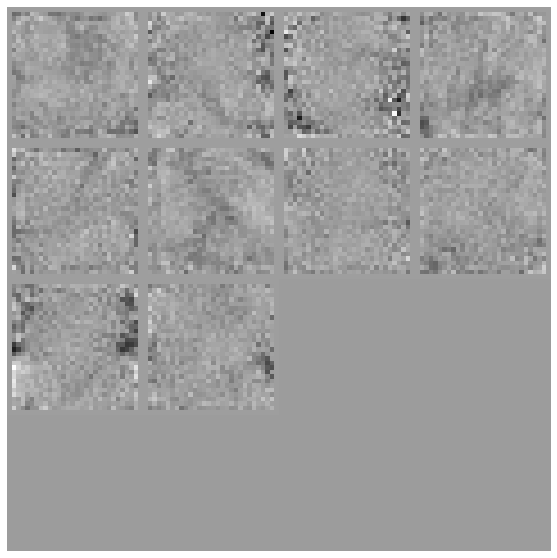

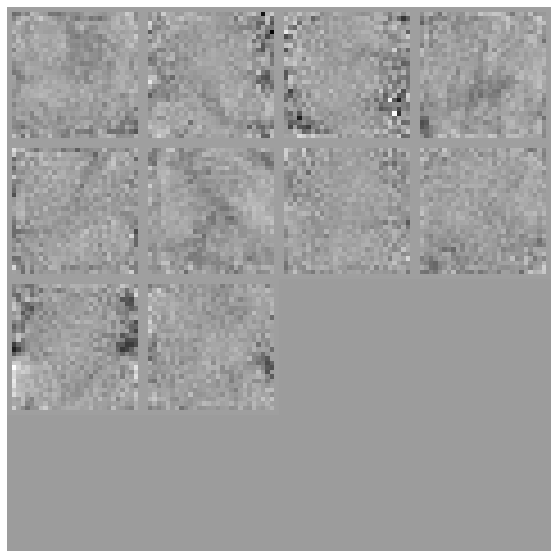

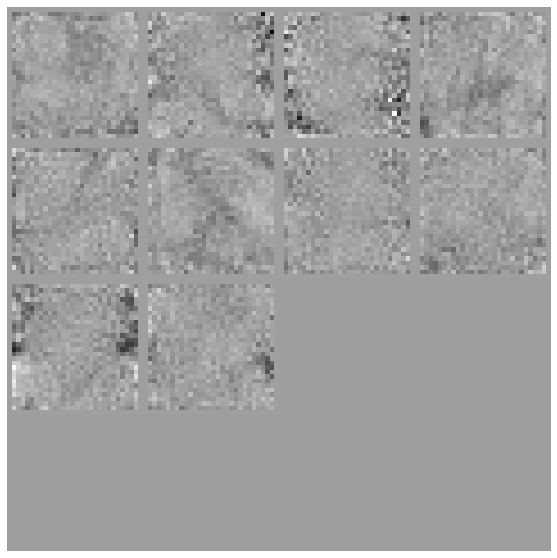

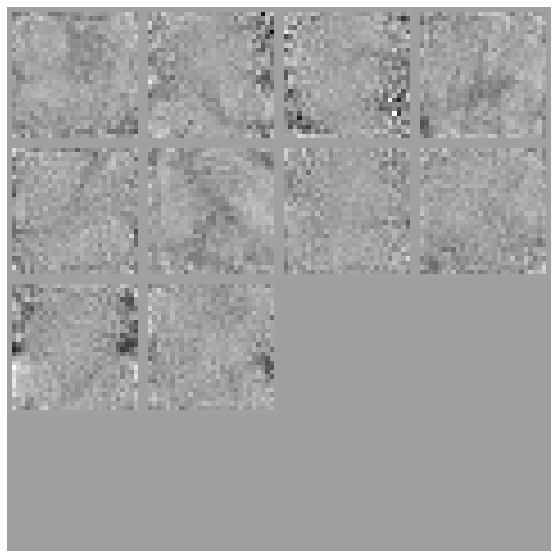

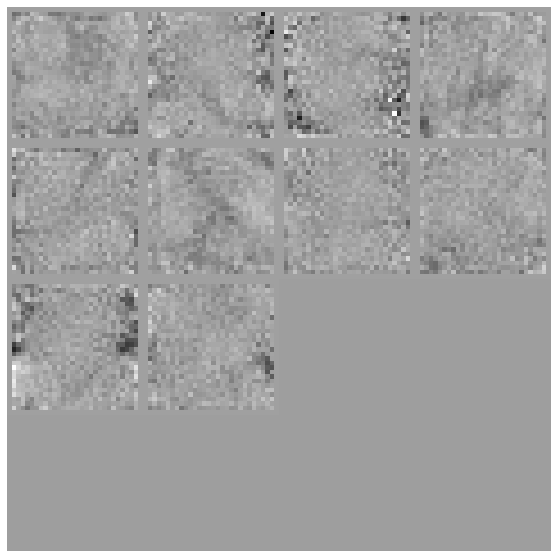

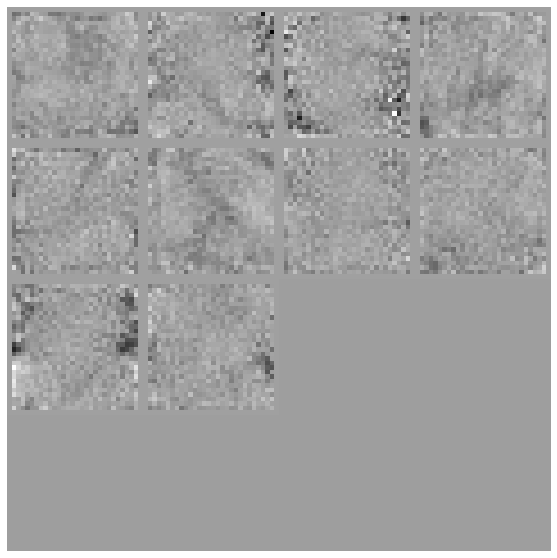

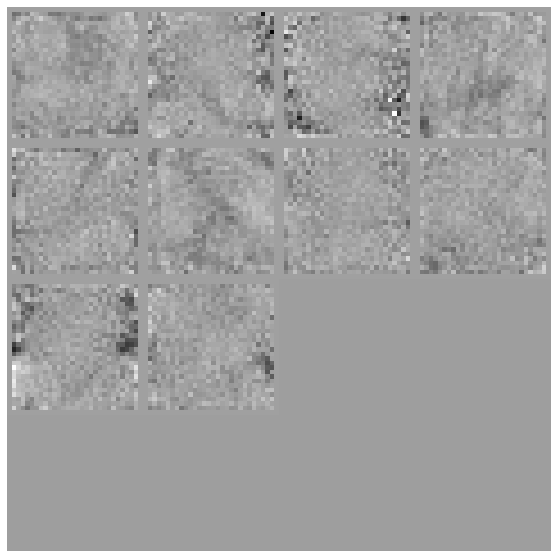

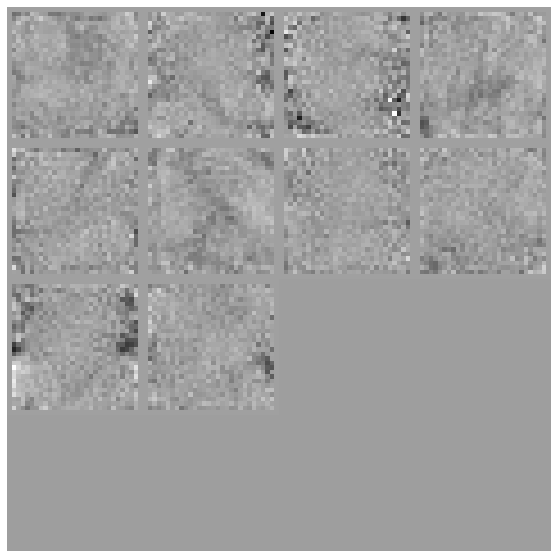

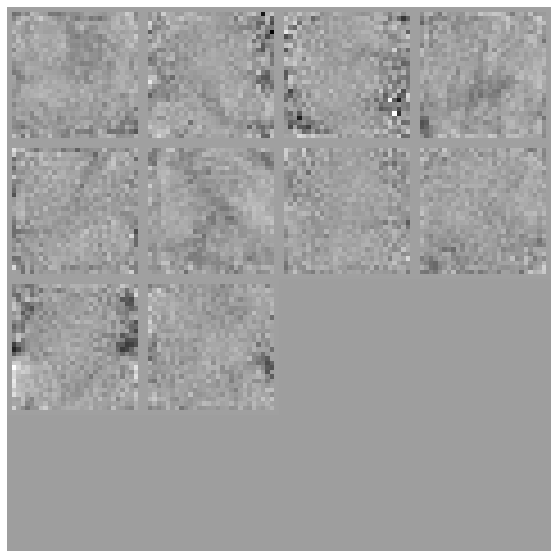

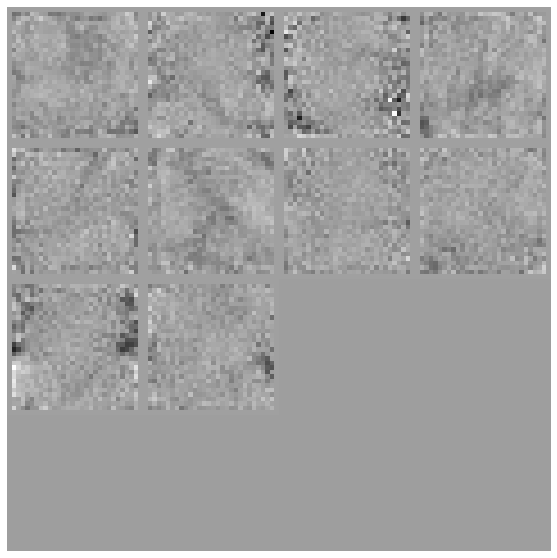

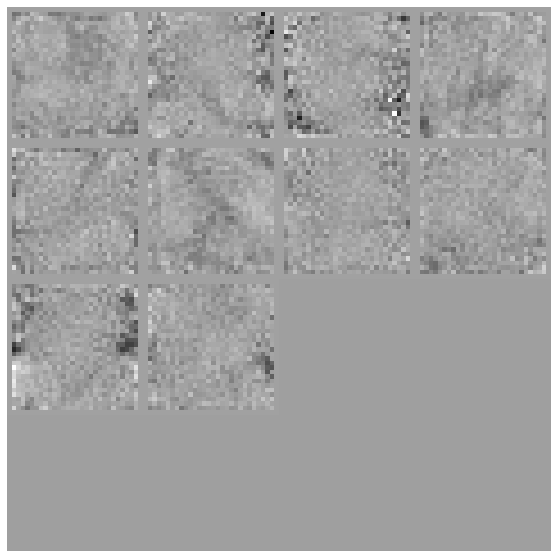

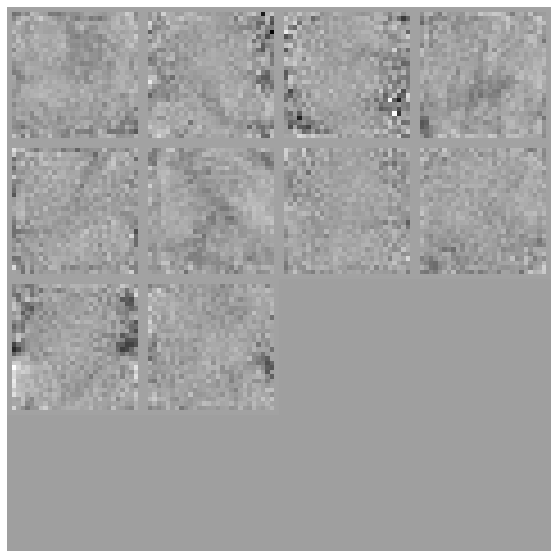

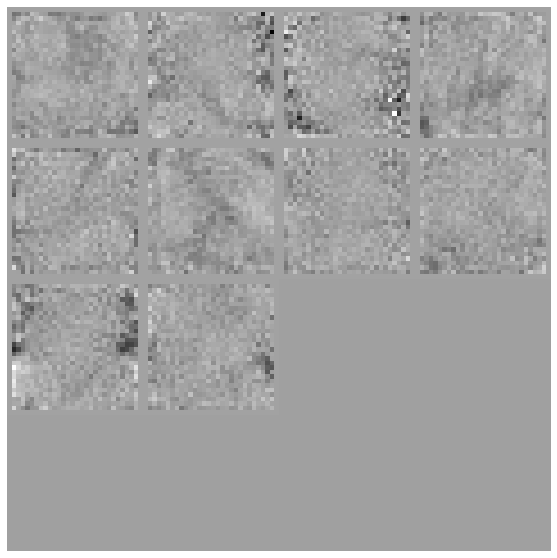

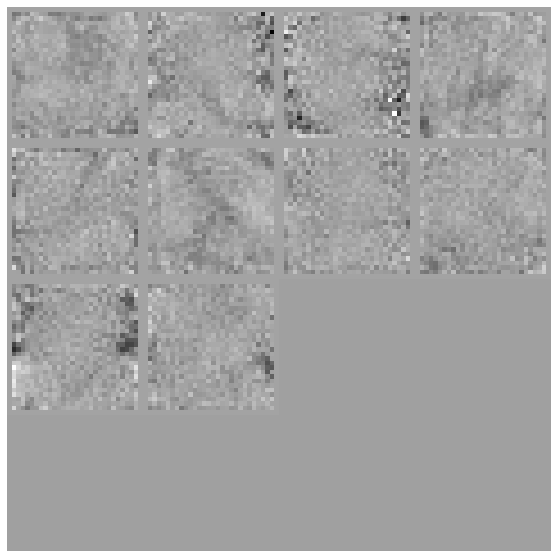

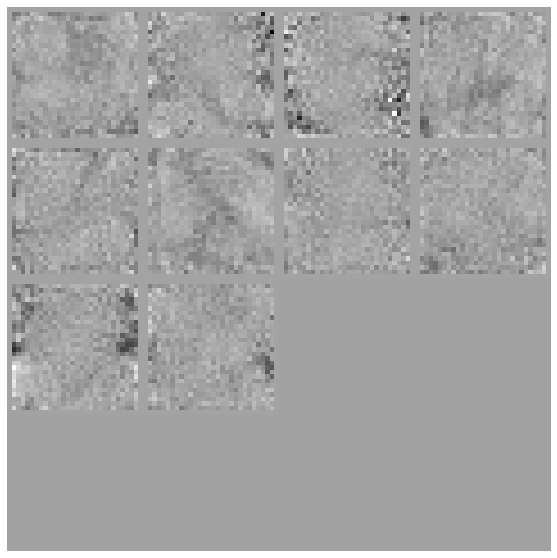

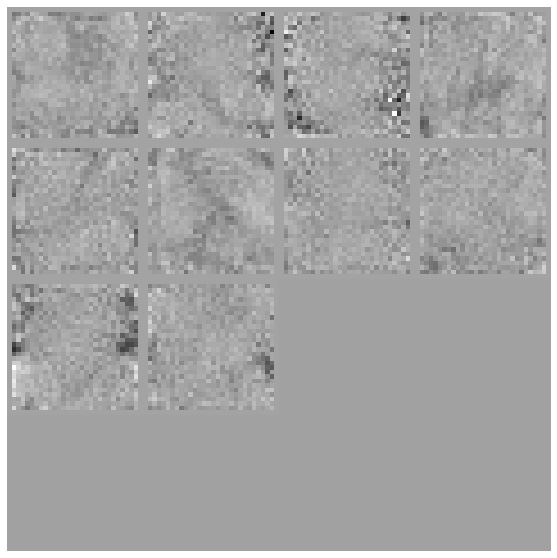

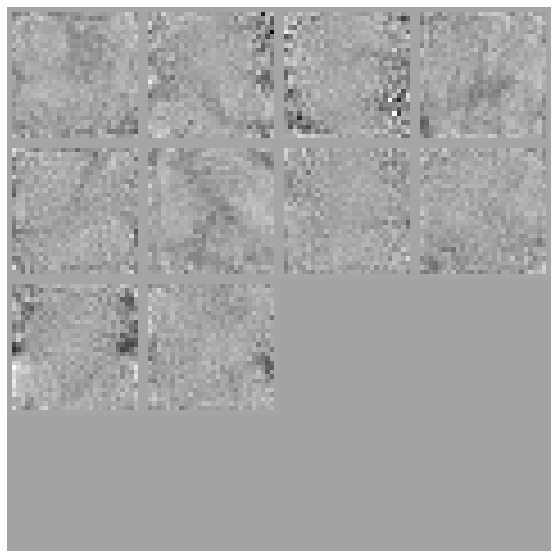

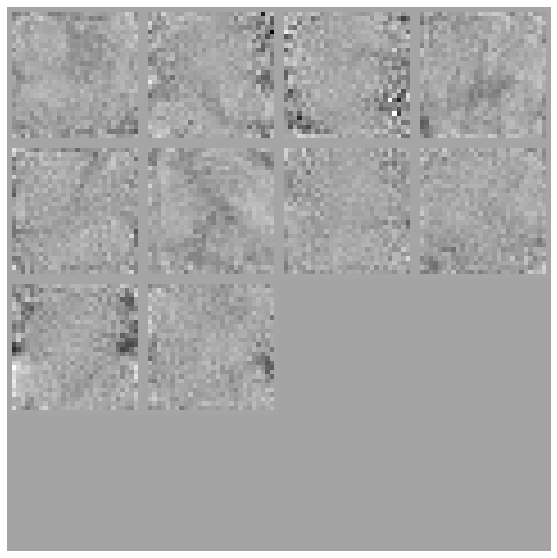

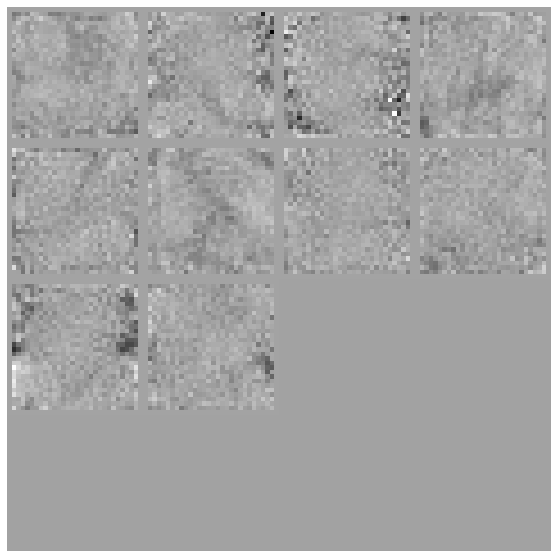

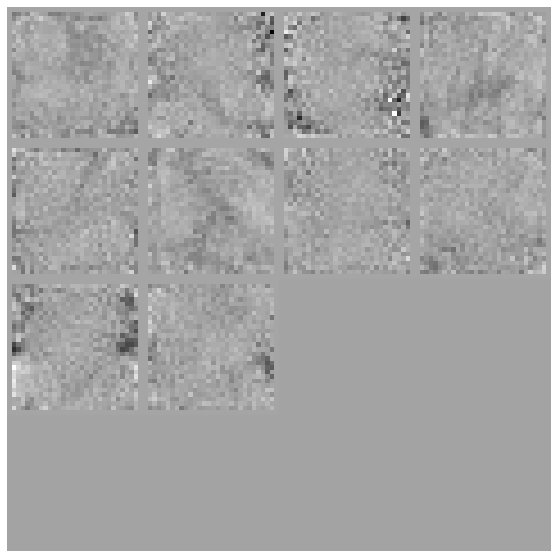

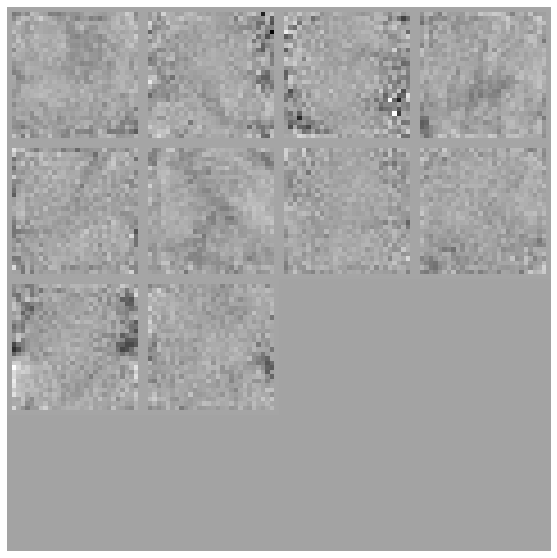

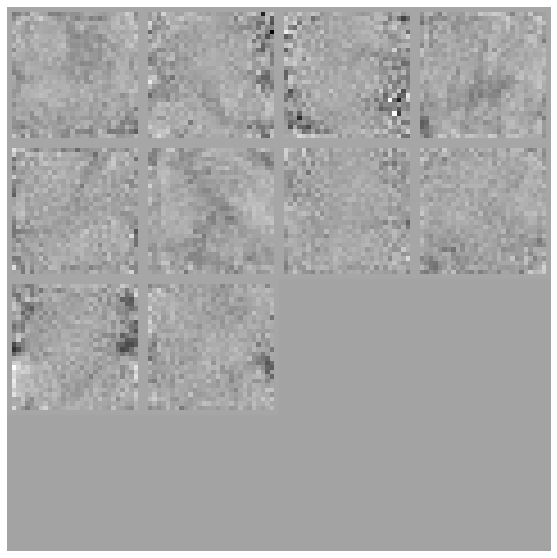

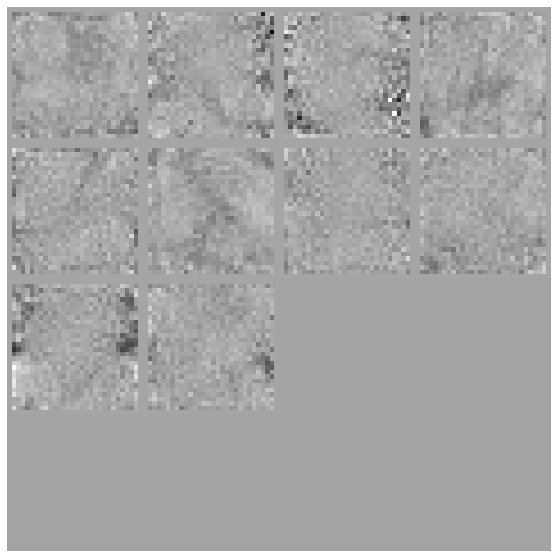

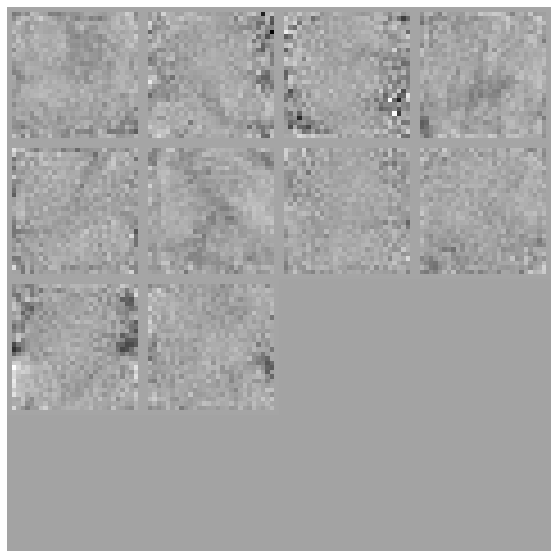

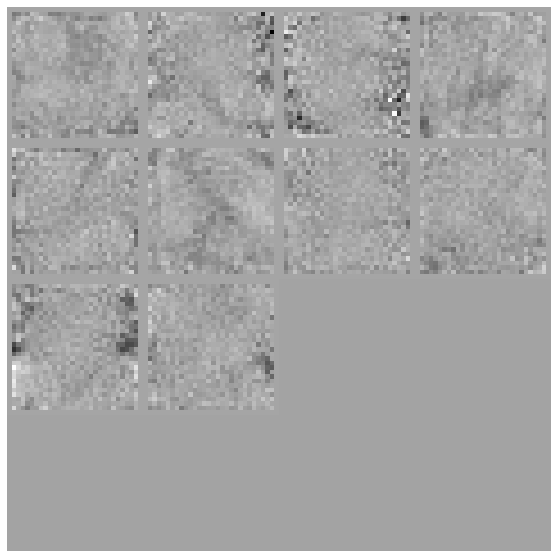

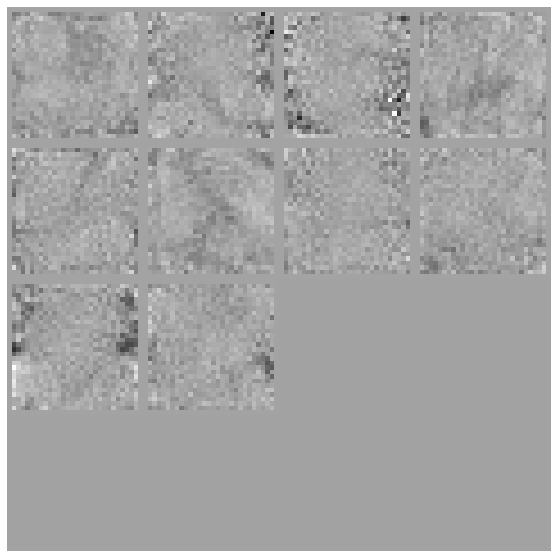

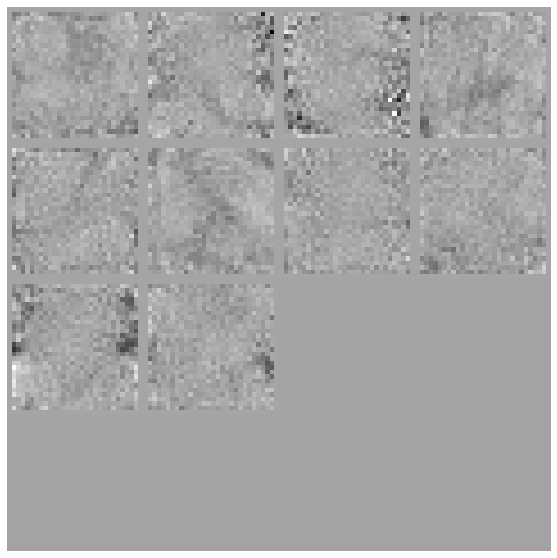

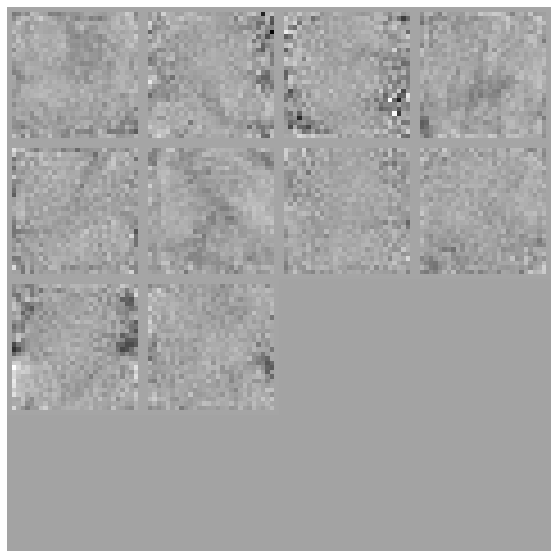

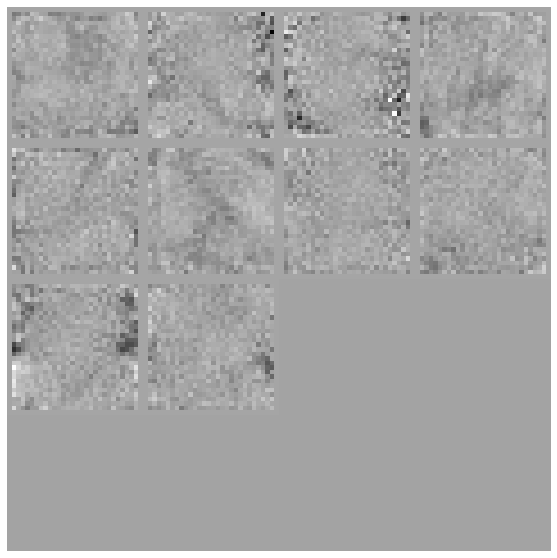

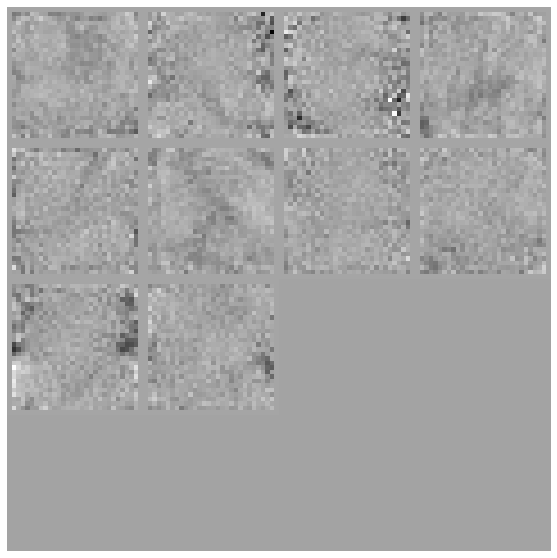

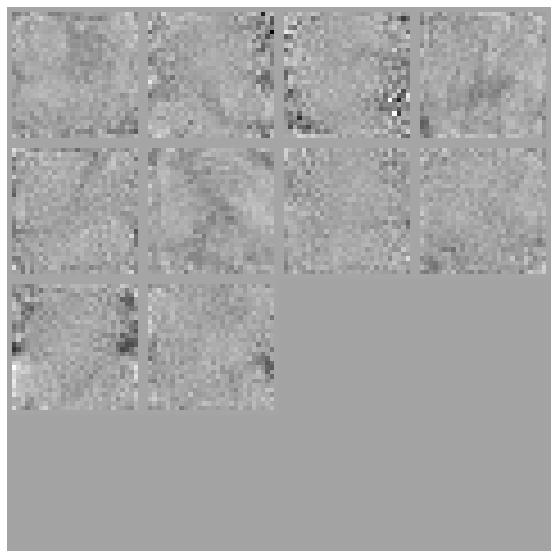

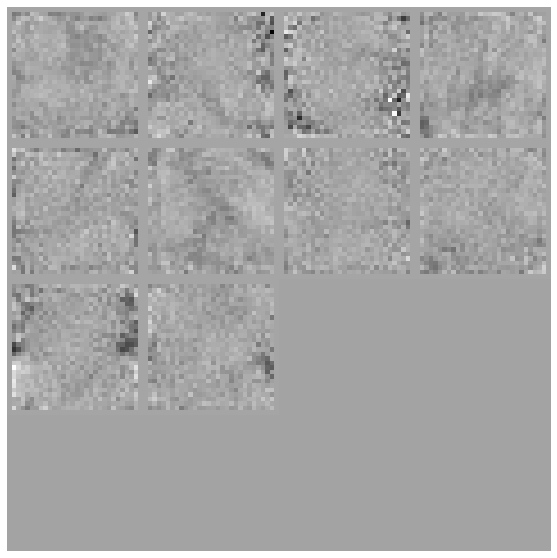

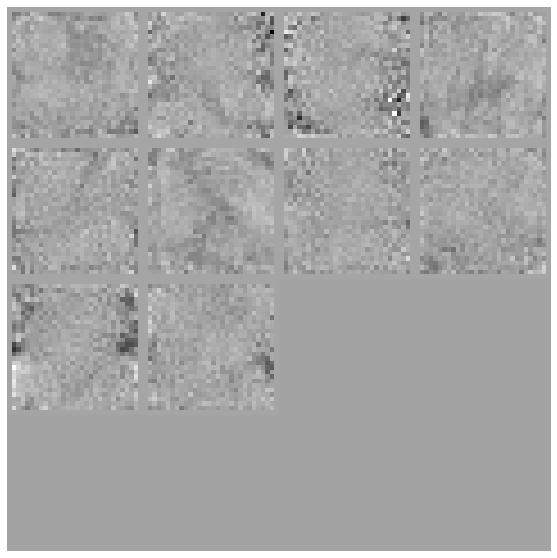

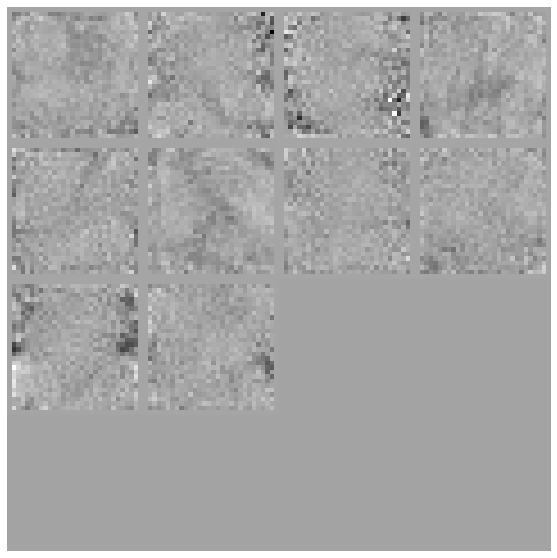

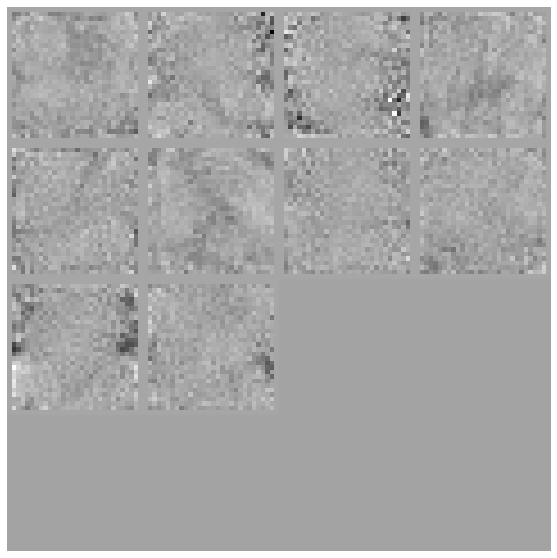

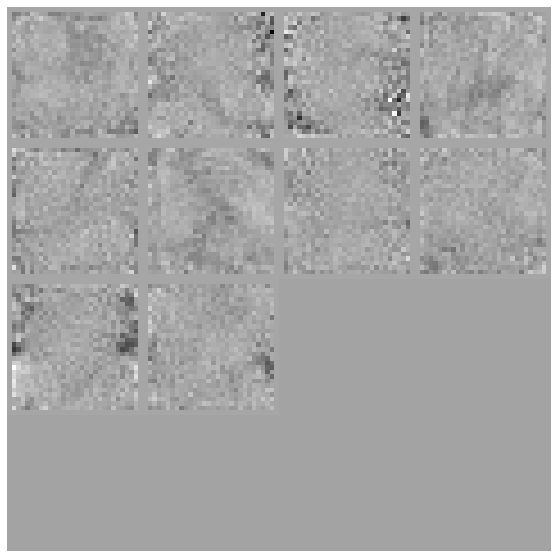

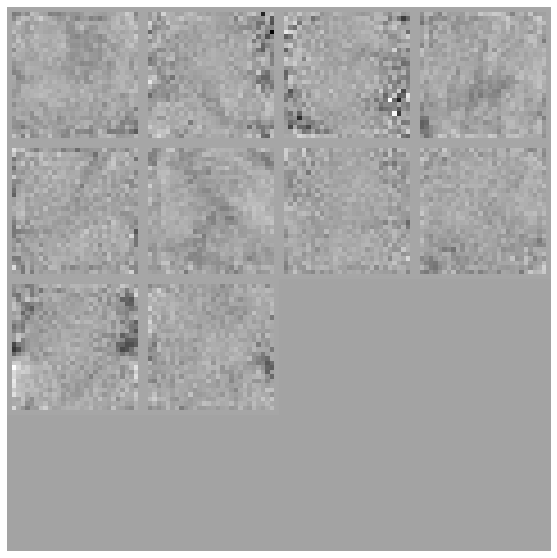

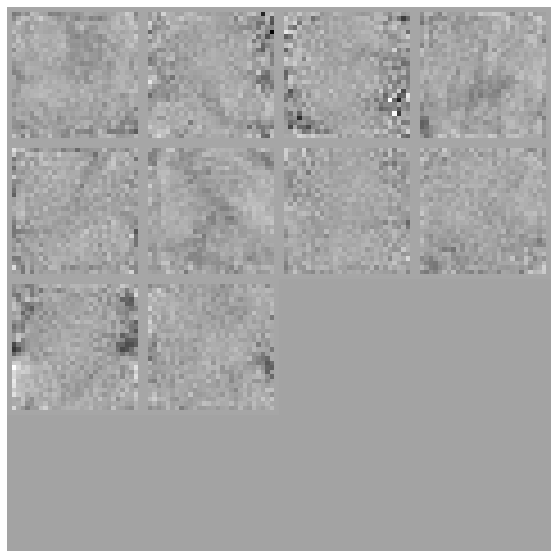

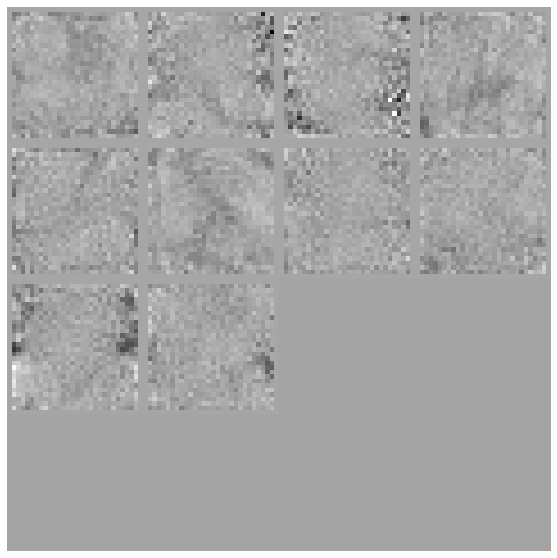

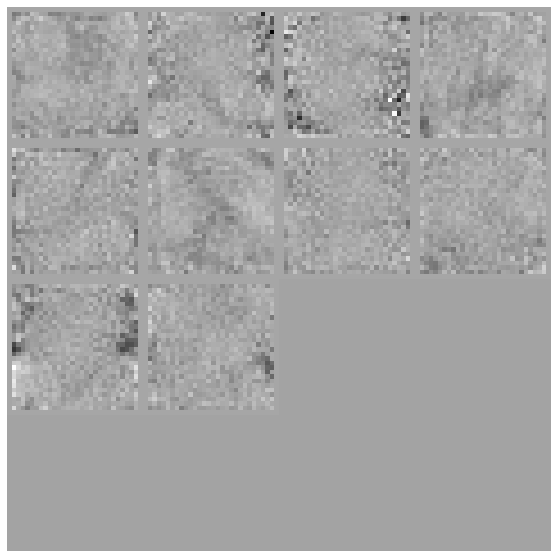

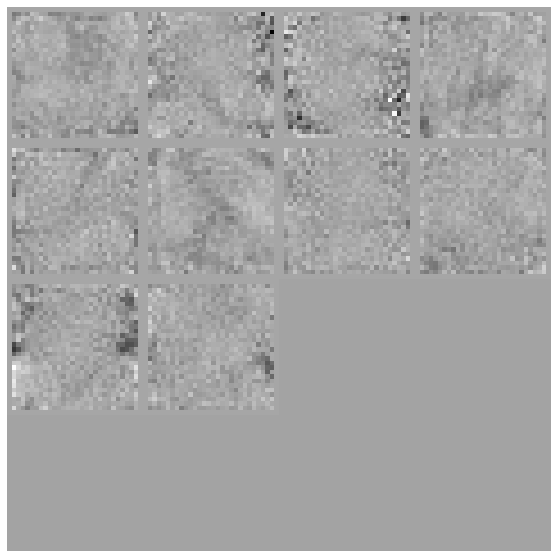

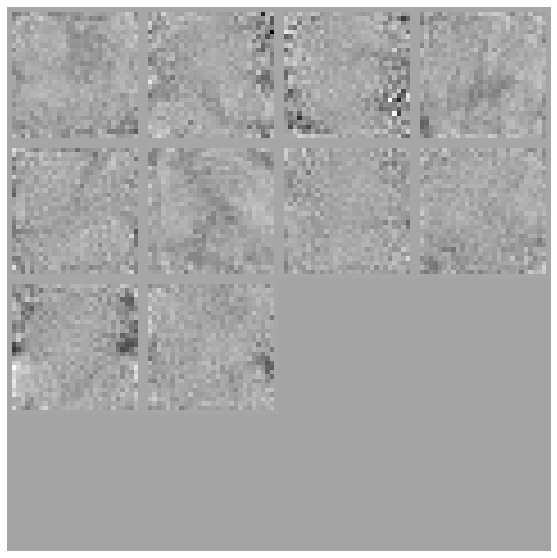

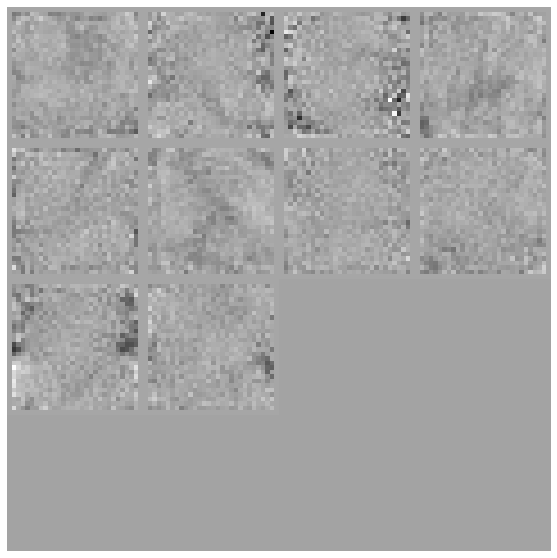

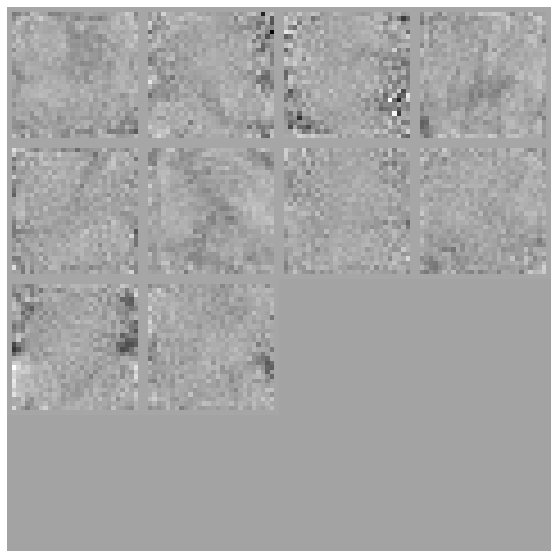

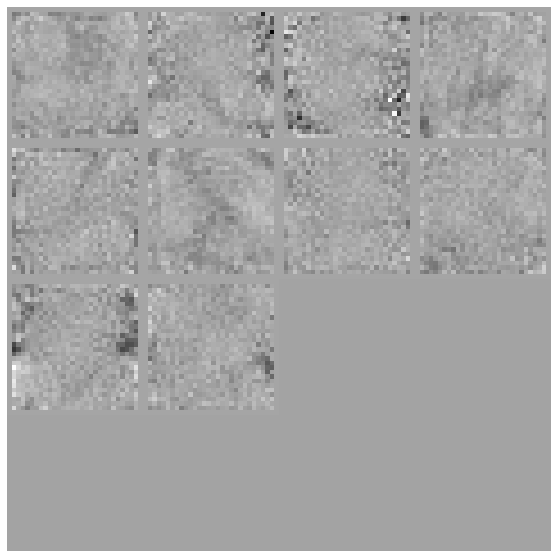

In [ ]:
wb.init(project="Simple_Linear_Adam_KMINST");
c = wb.config

c.h = 0.01
c.b = 1024
c.epochs = 100000

w = [GPU(Truncated_Normal((784,10)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()

    if i % 1000 == 0 : montage_plot((w[0].T).reshape(10,28,28).cpu().detach().numpy())

https://playground.tensorflow.org


https://tensorspace.org/

https://docs.google.com/presentation/d/1gY6kLb7YJtWzWqprVe3XfOjHALkPH6I1FvZ7MssWiTU/edit?usp=sharing